In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')
sns.set_context('talk')
import plotly.express as px
import re
from scipy import stats
from pandas.api.types import CategoricalDtype
!pip install mlxtend
import mlxtend.frequent_patterns 
import mlxtend.preprocessing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


You should consider upgrading via the '/Users/chiguo/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

/Users/chiguo/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
cust = pd.read_csv('/Users/chiguo/Downloads/QVI_purchase_behaviour.csv')

In [4]:
tranx = pd.read_excel('/Users/chiguo/Downloads/QVI_transaction_data.xlsx')

In [5]:
df_cust = cust.copy()
df_tranx = tranx.copy()

In [6]:
df_cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
df_tranx.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df_tranx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
df_cust.shape

(72637, 3)

In [11]:
df_tranx.shape

(264836, 8)

In [12]:
df_tranx.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
df_cust.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [14]:
df_tranx.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

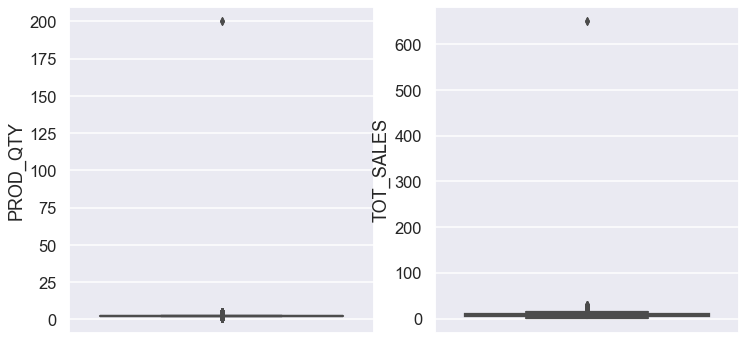

In [15]:
# the PROD_QTY of 200 and TOT_SALES of 650 draw our attention, we plot it out and discover further
fig, axes = plt.subplots(1, 2,  figsize=(12, 6))
sns.boxplot(ax = axes[0],
            data= df_tranx, 
            y="PROD_QTY",
            )
sns.boxplot(ax = axes[1],
            data= df_tranx, 
            y="TOT_SALES",
            )

plt.show()

In [16]:
# We found that the extreme sales quantity and total sales figures are from the same two transactions
# with same product, same customer. We can consider to remove these two transactions 
df_tranx[df_tranx['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [6]:
df_tranx = df_tranx[df_tranx['PROD_QTY']!=200]

In [7]:
df_tranx.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [19]:
df_cust['LYLTY_CARD_NBR'].nunique()

72637

In [20]:
# Seems we have 1 less customer in transaction dataset, which should be the customer that we deleted in the previous steps
df_tranx['LYLTY_CARD_NBR'].nunique()

72636

In [21]:
df_tranx['STORE_NBR'].nunique()

272

In [22]:
df_tranx['TXN_ID'].nunique()

263125

In [23]:
for feature in ['LIFESTAGE','PREMIUM_CUSTOMER']:
    print(str(df_cust[feature].value_counts()) +'\n')

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64



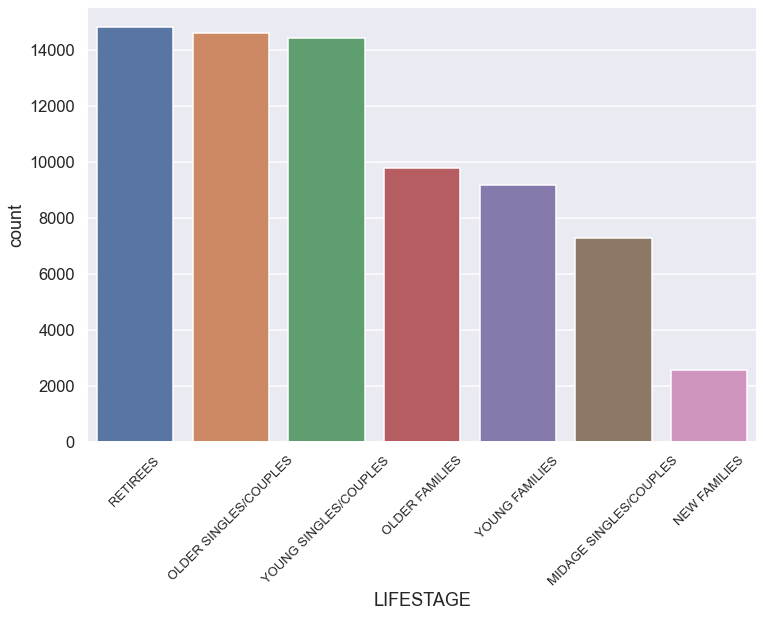

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data= df_cust, 
              x="LIFESTAGE",
              order = df_cust['LIFESTAGE'].value_counts().index
              )
plt.xticks(rotation=45, fontsize=13)
plt.show()

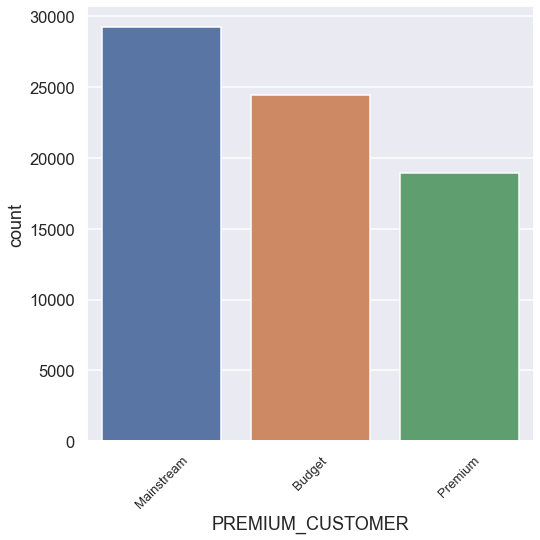

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data= df_cust, 
              x="PREMIUM_CUSTOMER",
              order = df_cust['PREMIUM_CUSTOMER'].value_counts().index
              )
plt.xticks(rotation=45, fontsize=13)
plt.show()

In [8]:
# convert the date format from Excel integer to datetime
df_tranx['DATE'] = pd.to_datetime(df_tranx['DATE'], unit='D', origin='1899-12-30')

In [9]:
df_tranx['DATE'].sort_values() 

205333   2018-07-01
202059   2018-07-01
102495   2018-07-01
217968   2018-07-01
149892   2018-07-01
            ...    
152885   2019-06-30
77974    2019-06-30
51400    2019-06-30
132841   2019-06-30
6570     2019-06-30
Name: DATE, Length: 264834, dtype: datetime64[ns]

In [28]:
# We can see our dataset starts from 2018/07/01 to 2019/06/30
# We here check if any date is missing from this time period
date_diff = pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(df_tranx['DATE'])

In [29]:
# Here we see that the only date that is not in our dataset is the Christmas Day on which most retails were closed
date_diff

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [30]:
df_tranx['PROD_NAME'].nunique()

114

In [10]:
df_tranx['BRAND'] = df_tranx['PROD_NAME'].map(lambda x: x.split()[0])
df_tranx['PROD_NAME'] = df_tranx['PROD_NAME'].map(lambda x: x.split(maxsplit=1)[1])

In [11]:
# Here we see there are some duplicate brands which needs to be coped with before going ahead
df_tranx['BRAND'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [12]:
df_tranx['BRAND'].replace(to_replace=['Smith','Dorito','WW','Infzns','Red','RRD','Grain','GrnWves','Snbts','NCC','Natural'], 
                          value=['Smiths', 'Doritos', 'Woolworths', 'Infuzions', 'Red Rock Deli','Red Rock Deli',
                                'Grain Waves', 'Grain Waves', 'Sunbites', 'Natural Chip Co', 'Natural Chip Co'],inplace=True)


In [13]:
df_tranx['BRAND'].value_counts()

Kettle             41288
Smiths             31823
Doritos            28145
Pringles           25102
Red Rock Deli      17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old                 9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: BRAND, dtype: int64

In [14]:
# Extract the package size figures and create a new column 'PACK_SIZE'
df_tranx['PACK_SIZE'] = df_tranx['PROD_NAME'].str.extract("(\d+)")

In [15]:
# Remove any special characters and figures from the product names
df_tranx['PROD_NAME'] = df_tranx['PROD_NAME'].map(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x).strip())
df_tranx['PROD_NAME'] = df_tranx['PROD_NAME'].map(lambda x: re.sub('\d\w*', '', x).strip())

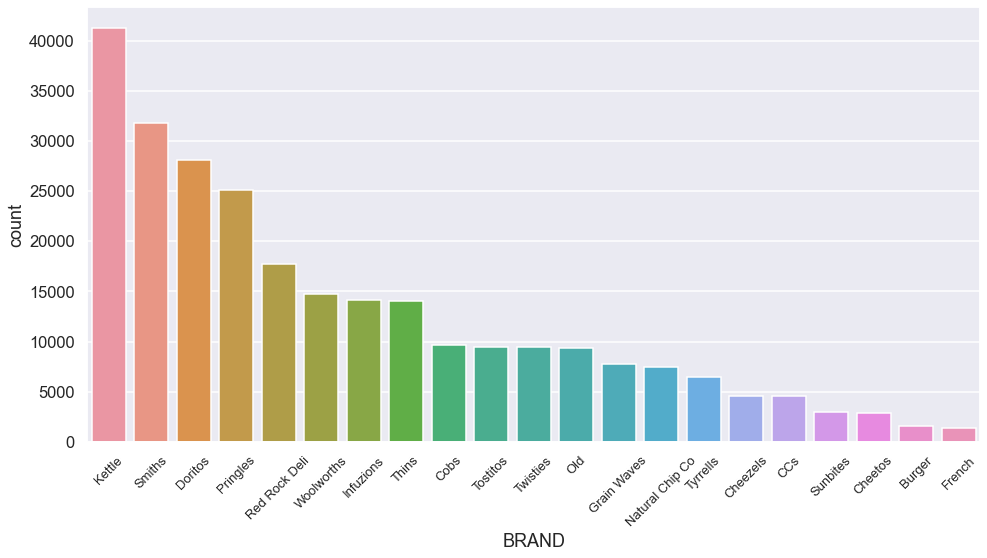

In [38]:
# plot to see brand popularity

plt.figure(figsize=(16,8))
sns.countplot(data= df_tranx, 
              x="BRAND",
              order = df_tranx['BRAND'].value_counts().index)
plt.xticks(rotation=45, fontsize=13)
plt.show()

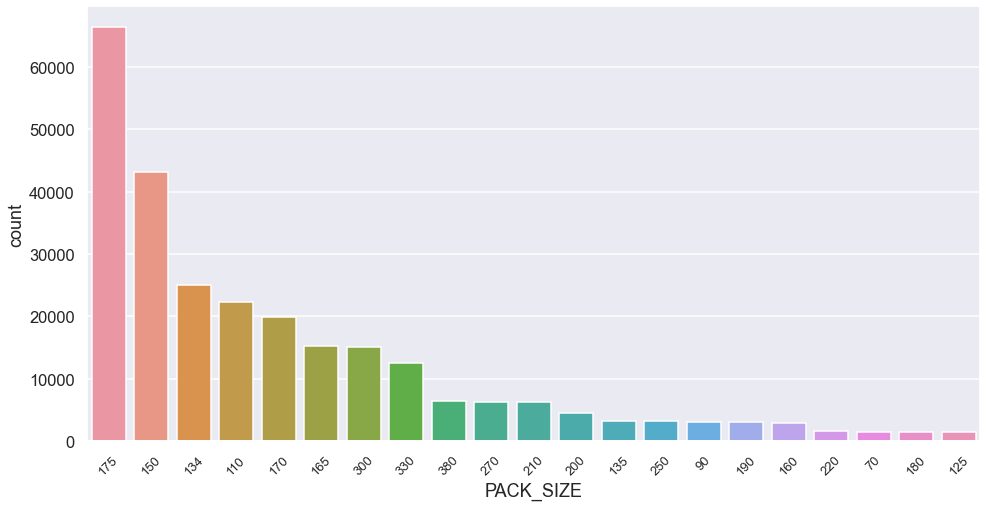

In [39]:
# plot to see package size popularity

plt.figure(figsize=(16,8))
sns.countplot(data= df_tranx, 
              x="PACK_SIZE",
              order = df_tranx['PACK_SIZE'].value_counts().index)
plt.xticks(rotation=45, fontsize=13)
plt.show()

In [16]:
# Then we are trying to combine two datasets for further analysis
df = df_tranx.merge(df_cust, on = 'LYLTY_CARD_NBR', how='left')

In [41]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Chip Compny SeaSalt,2,6.0,Natural Chip Co,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Nacho Cheese,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Crinkle Cut Chips Chicken,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Chip Thinly SCreamOnion,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Tortilla ChpsHnyJlpno Chili,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [22]:
df.to_excel("QVI_comb.xlsx")  

## First we are trying to explore the relationship between seasons, days and the sales performance

In [18]:
df['DAY'] = df['DATE'].dt.day

In [19]:
df['SEASON'] = (df['DATE'].dt.month - 1) // 3
df['SEASON']

0         3
1         1
2         1
3         2
4         2
         ..
264829    0
264830    2
264831    3
264832    3
264833    2
Name: SEASON, Length: 264834, dtype: int64

In [44]:
df_season = df.groupby(['SEASON','DAY']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
df_season.reset_index(inplace = True)


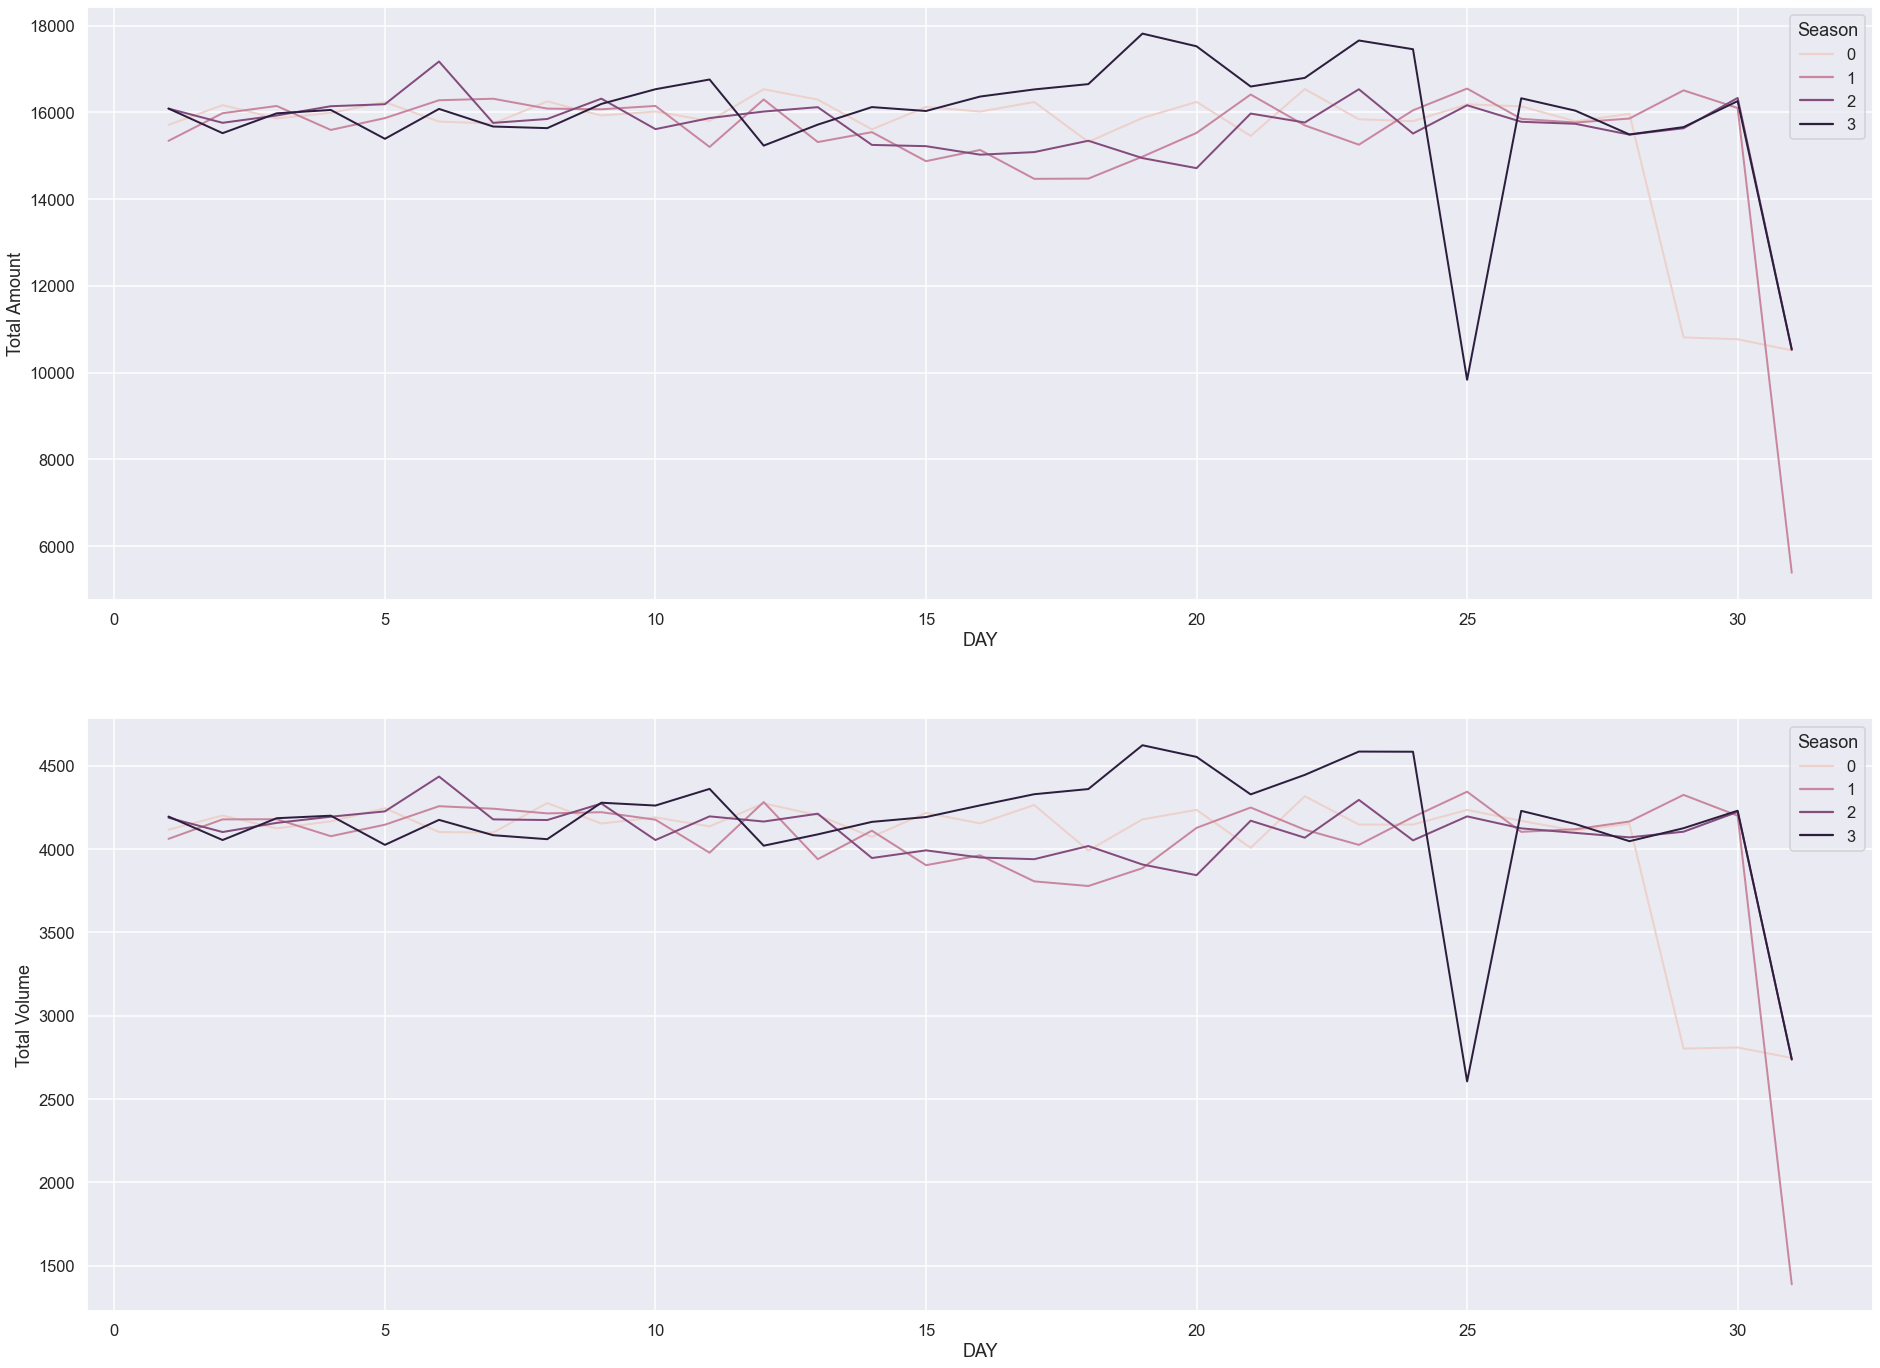

In [45]:
fig, axes = plt.subplots(2, 1,  figsize=(32,24))


sns.lineplot(ax = axes[0], 
             data = df_season, 
             x = 'DAY', 
             y = 'TOT_SALES', 
             hue = 'SEASON', 
             linewidth =2, 
             )

sns.lineplot(ax = axes[1], 
             data = df_season, 
             x = 'DAY', 
             y = 'PROD_QTY', 
             hue = 'SEASON', 
             linewidth =2, 
             )

axes[0].set_ylabel('Total Amount', fontsize= 18)
axes[1].set_ylabel('Total Volume', fontsize= 18)
axes[0].legend(title='Season', loc=1)
axes[1].legend(title='Season', loc=1)

plt.show()


In [46]:
df_day = df.groupby(['DATE']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
df_day.reset_index(inplace = True)


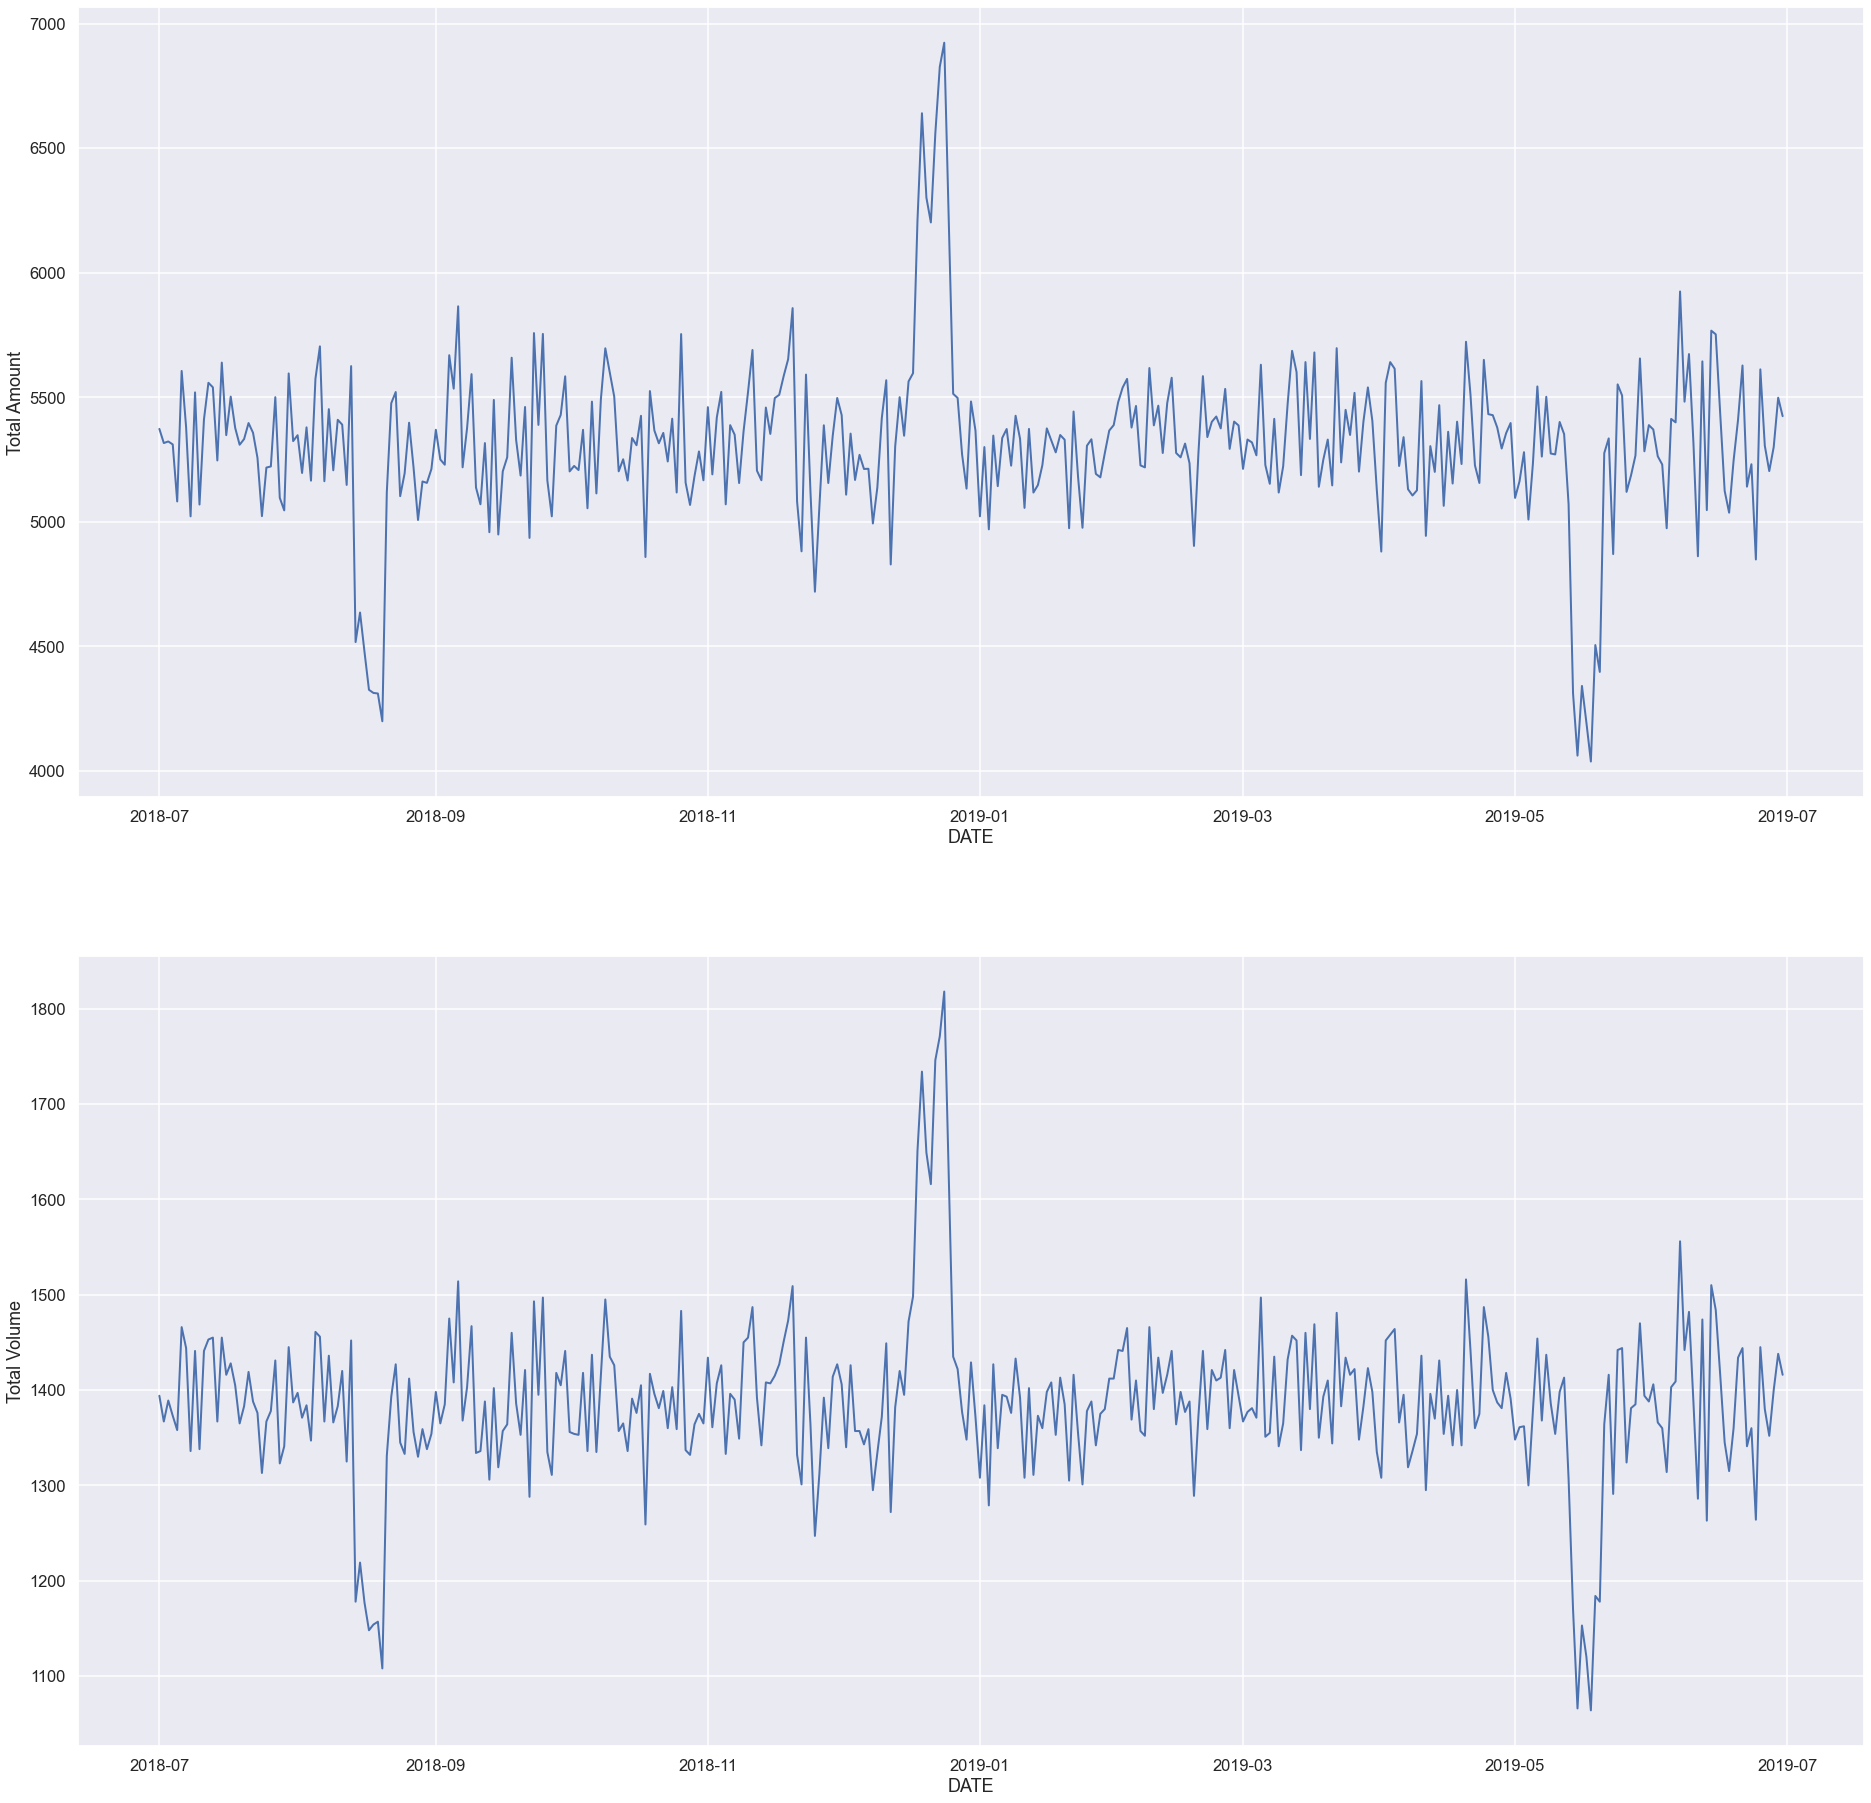

In [90]:
fig, axes = plt.subplots(2, 1,  figsize=(32,32))


sns.lineplot(ax = axes[0], 
             data = df_day, 
             x = 'DATE', 
             y = 'TOT_SALES', 
             linewidth =2, 
             )

sns.lineplot(ax = axes[1], 
             data = df_day, 
             x = 'DATE', 
             y = 'PROD_QTY',  
             linewidth =2, 
             )

axes[0].set_ylabel('Total Amount', fontsize= 18)
axes[1].set_ylabel('Total Volume', fontsize= 18)


plt.show()

In [48]:
df_day['SALES_PER_TXN'] = df_day['TOT_SALES']/df_day['TXN_ID']
df_day['SALES_PER_ITEM'] = df_day['TOT_SALES']/df_day['PROD_QTY']

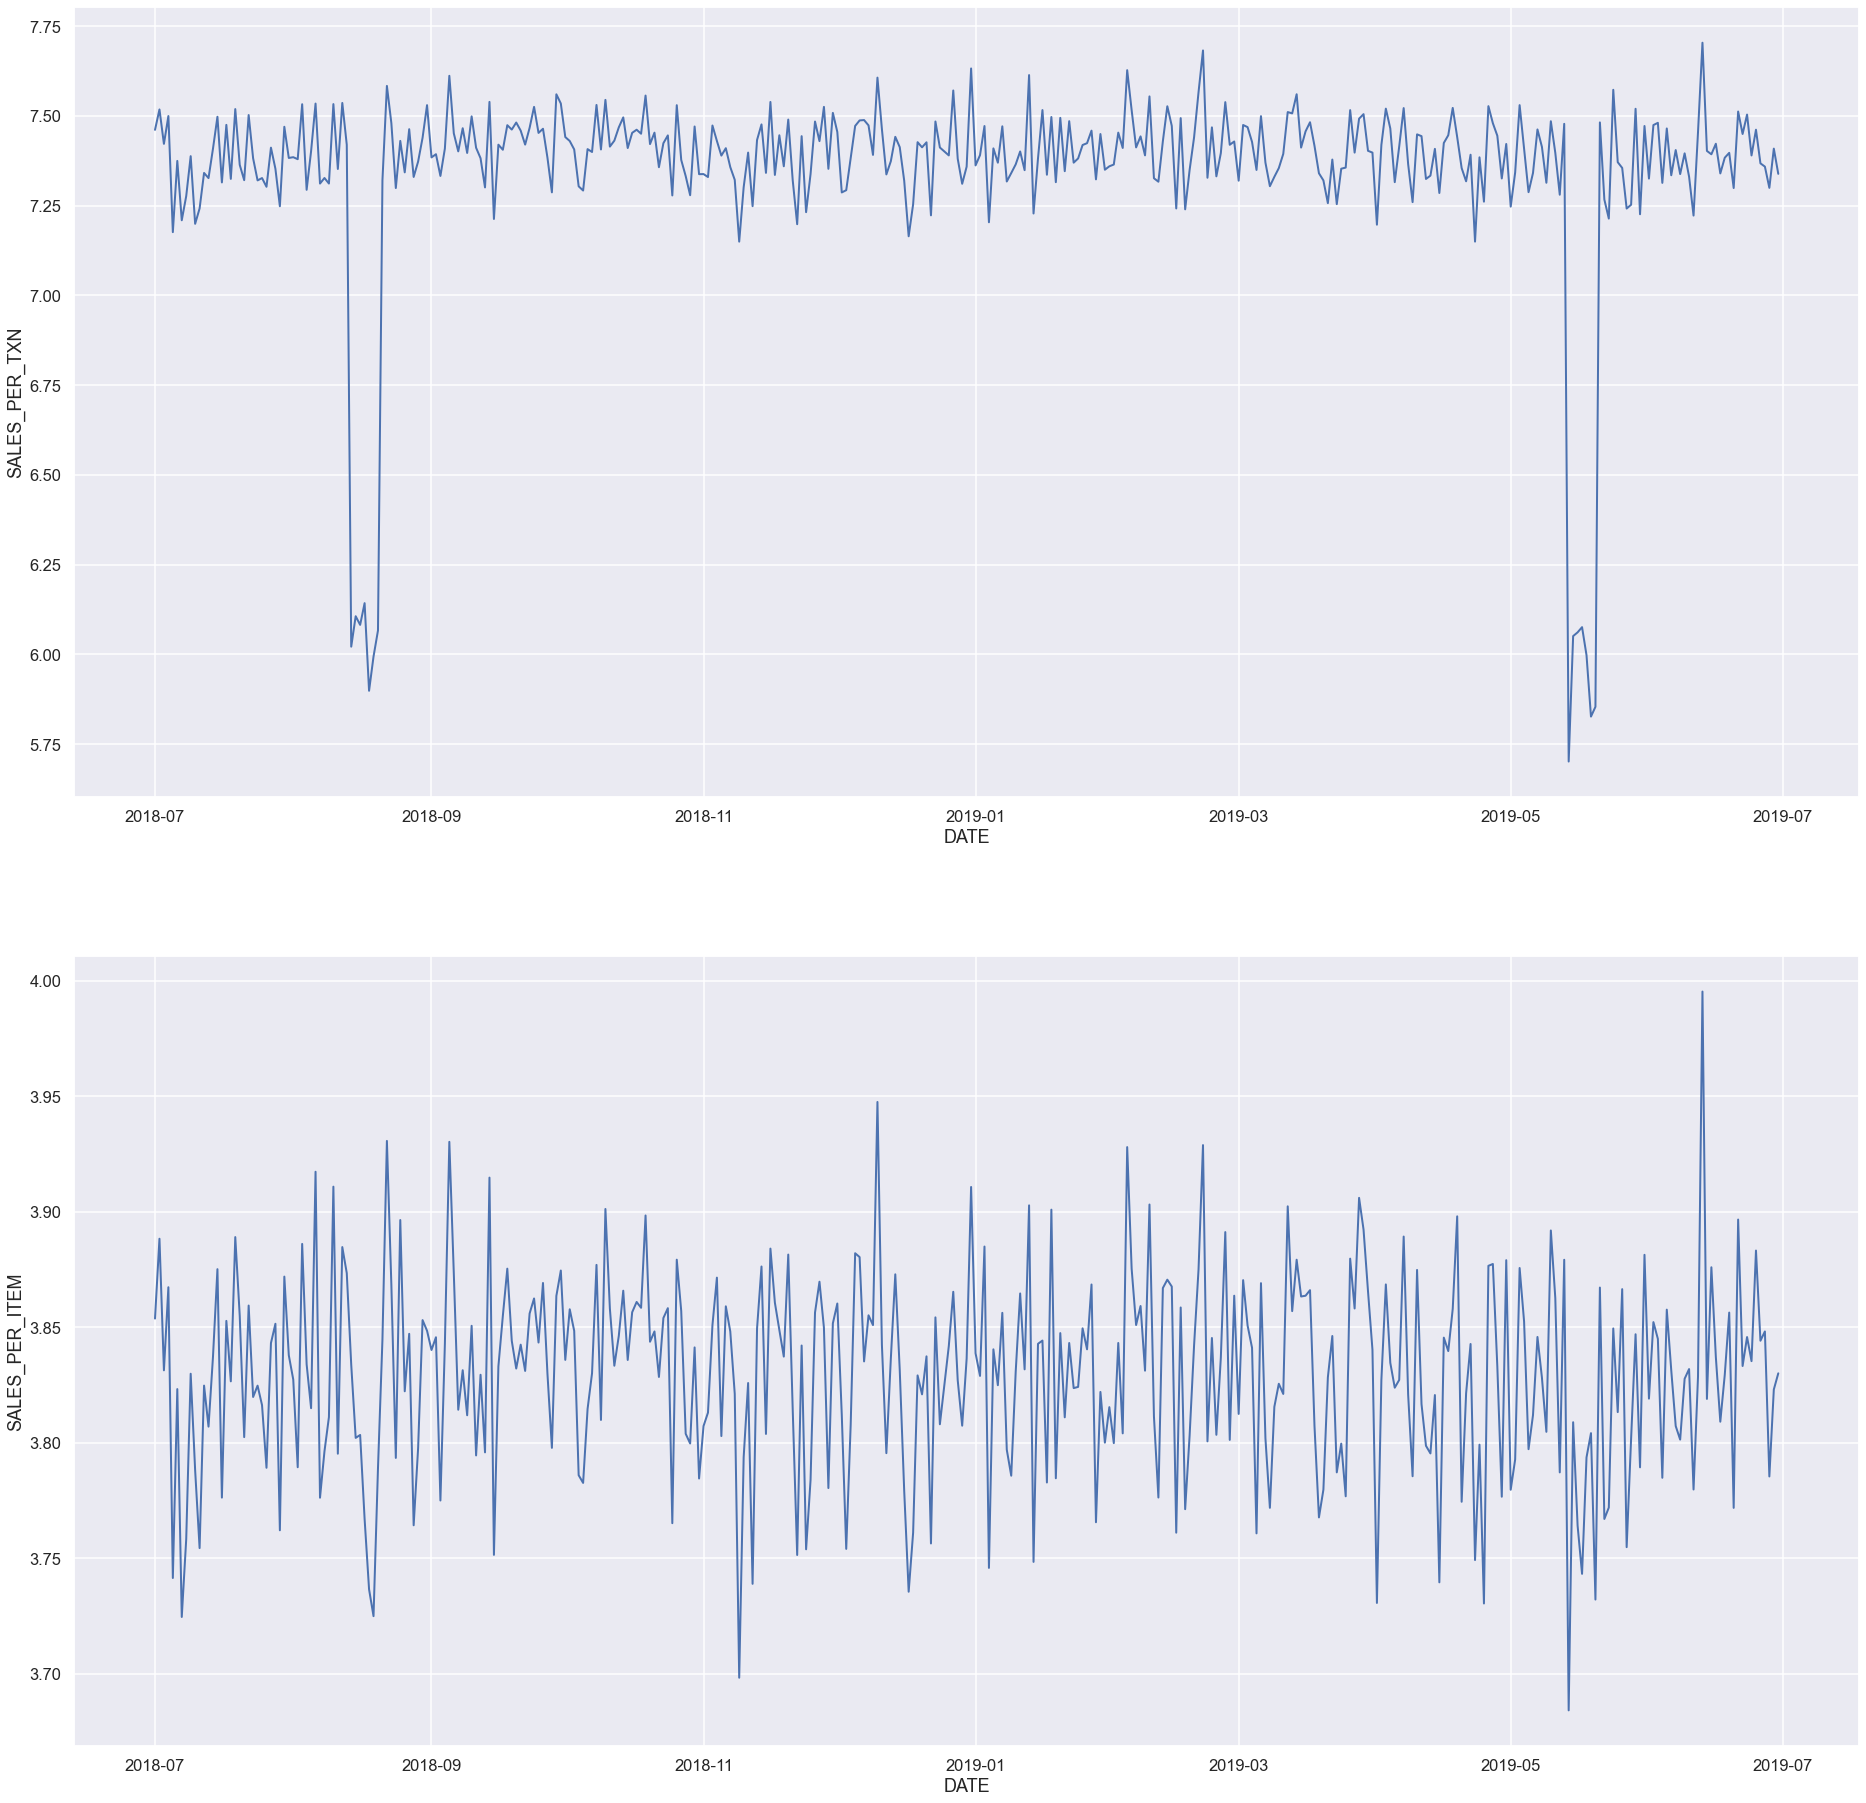

In [49]:
fig, axes = plt.subplots(2, 1,  figsize=(32,32))


sns.lineplot(ax = axes[0], 
             data = df_day, 
             x = 'DATE', 
             y = 'SALES_PER_TXN', 
             linewidth =2, 
             )

sns.lineplot(ax = axes[1], 
             data = df_day, 
             x = 'DATE', 
             y = 'SALES_PER_ITEM',  
             linewidth =2, 
             )

axes[0].set_ylabel('SALES_PER_TXN', fontsize= 18)
axes[1].set_ylabel('SALES_PER_ITEM', fontsize= 18)


plt.show()

***
From the above graghs we observed a sales peak right before the Christmas and it was mainly due to the increse of sales quantity as there were no obvious change from sales per txn/item, which means a much higher customer footfall.
Hence, the window period right before the Christmas Day will be an ideal period for promotional activities as it can easily reach out to much more customers without incurring too much extra costs.

However, for the two steep drops around the mid August and mid May, both overall sales volumes and sales amount per txn dropped significantly. To fruther understand the reason causing the decline, we may need to discuss with stores managers to obtain more information
***

In [20]:
# Create a 'weekday' column specify which day in a week that the transaction fell onto
df['WEEKDAY'] = df['DATE'].dt.day_name()

In [21]:
# create a categorical type to set the order of the weekdays
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['WEEKDAY'] = df['WEEKDAY'].astype(cat_type)

In [52]:
df_weekday = df.groupby(['WEEKDAY']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
df_weekday.reset_index(inplace = True)

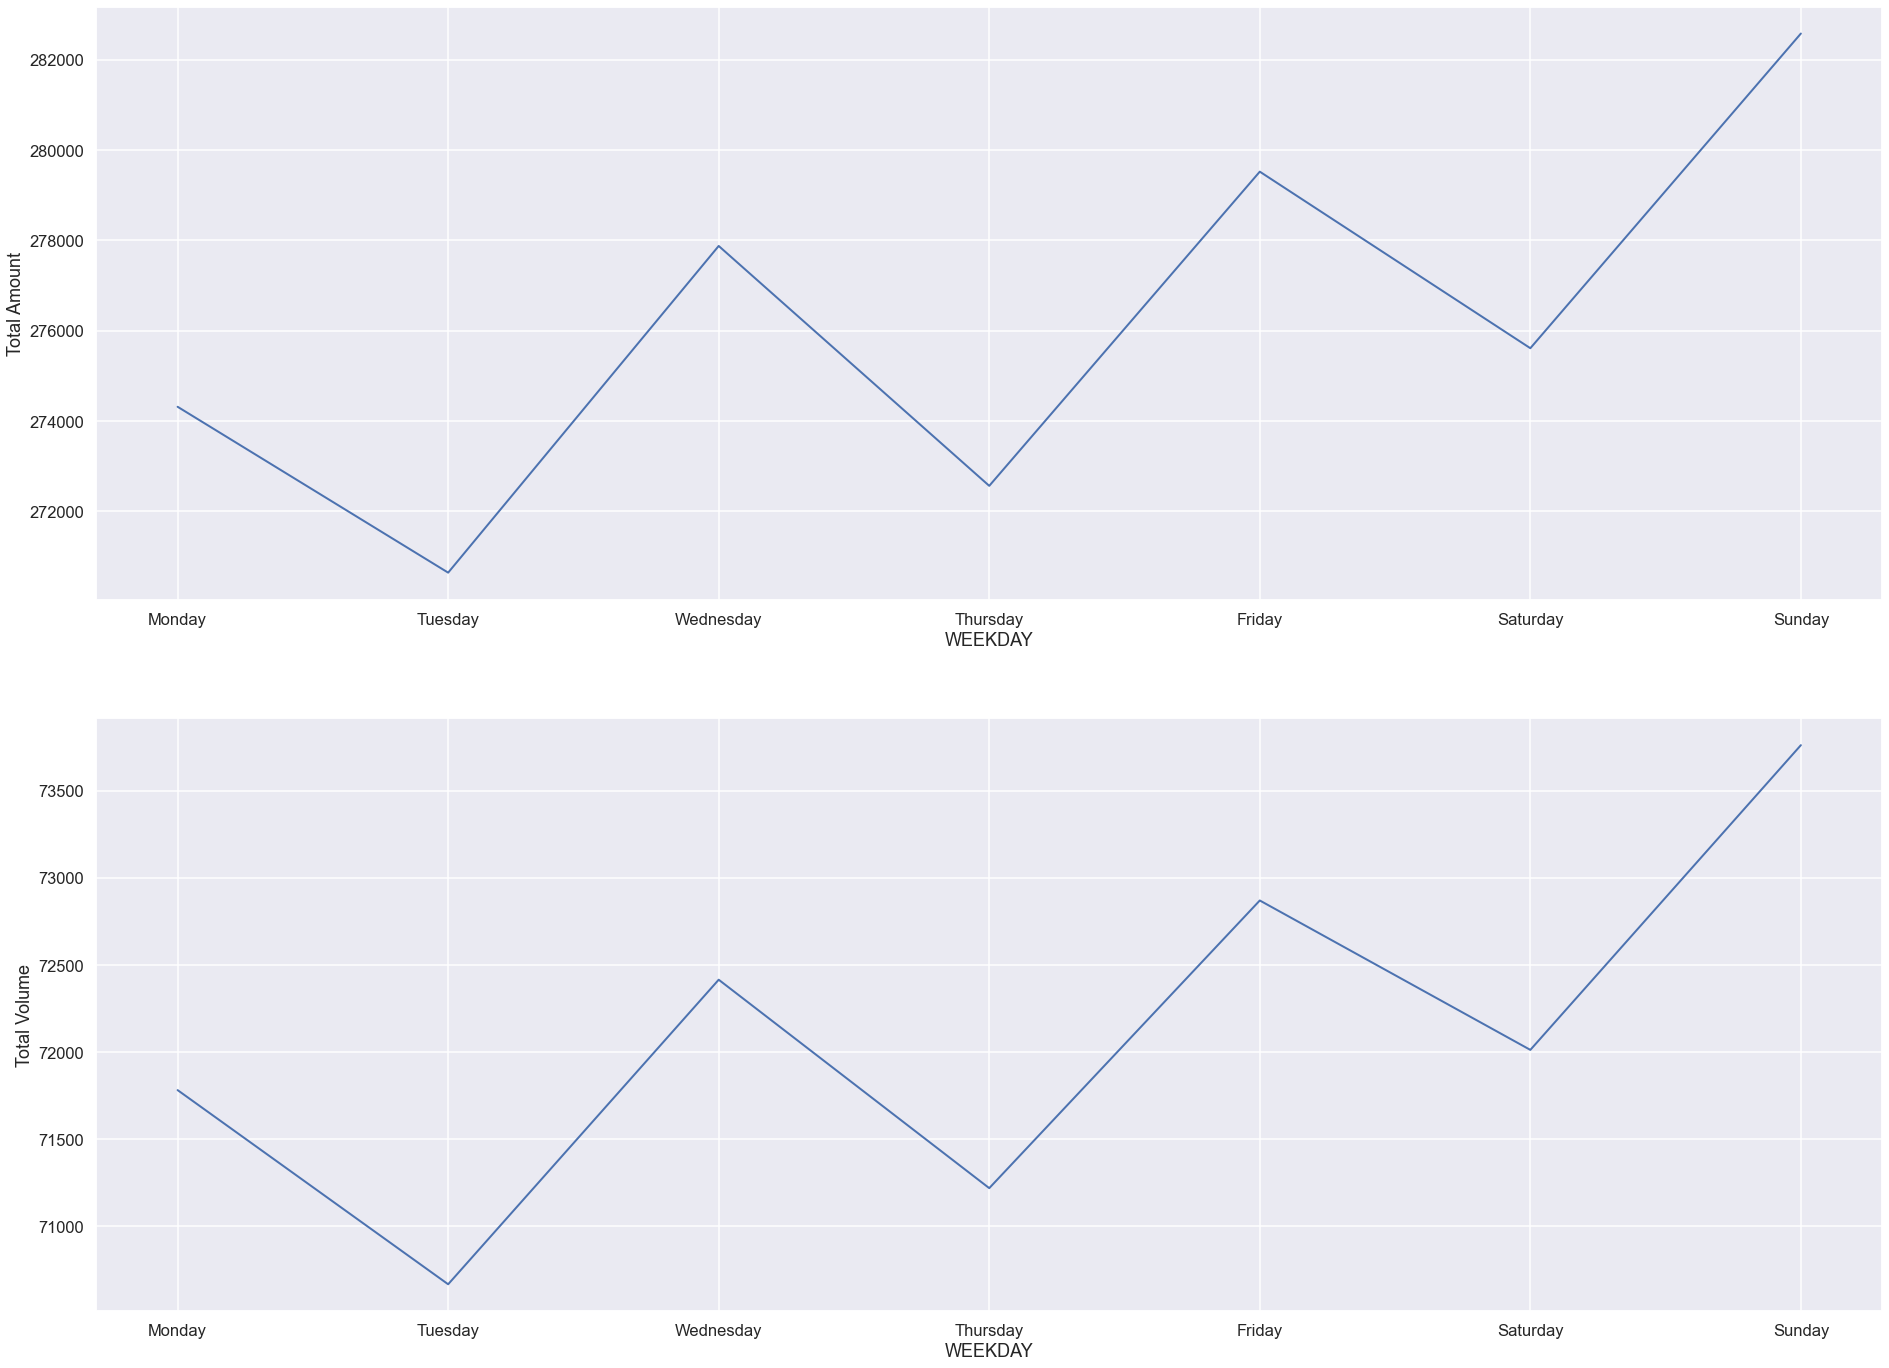

In [53]:
fig, axes = plt.subplots(2, 1,  figsize=(32,24))


sns.lineplot(ax = axes[0], 
             data = df_weekday, 
             x = 'WEEKDAY', 
             y = 'TOT_SALES', 
             linewidth =2, 
             )

sns.lineplot(ax = axes[1], 
             data = df_weekday, 
             x = 'WEEKDAY', 
             y = 'PROD_QTY',  
             linewidth =2, 
             )

axes[0].set_ylabel('Total Amount', fontsize= 18)
axes[1].set_ylabel('Total Volume', fontsize= 18)


plt.show()

## Next we are trying to discover the relationship between customer segments and the sales performance

In [54]:
df_lifestage = df.groupby(['LIFESTAGE']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).sort_values(by='TOT_SALES')
df_lifestage.reset_index(inplace = True)
df_lifestage.head()

,LIFESTAGE,TXN_ID,TOT_SALES,PROD_QTY
0,NEW FAMILIES,6896,50433.45,12847
1,MIDAGE SINGLES/COUPLES,24949,184751.30,47721
2,YOUNG SINGLES/COUPLES,36255,260405.30,66634
3,YOUNG FAMILIES,43242,316160.10,84561
4,OLDER FAMILIES,48124,352467.20,94592


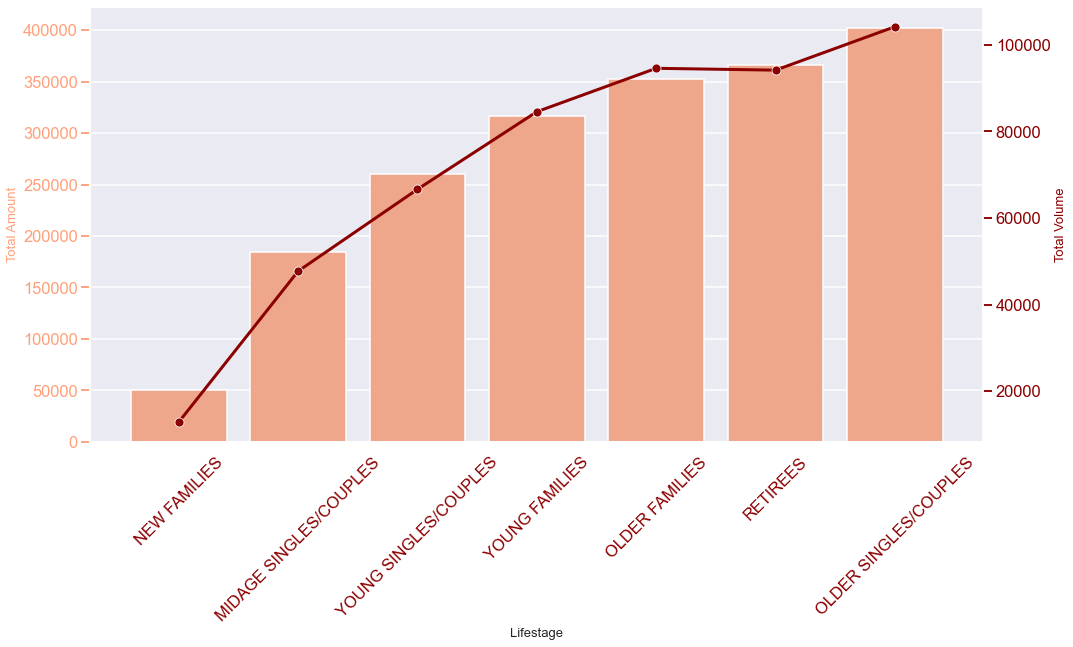

In [55]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(data = df_lifestage, 
                  x="LIFESTAGE", 
                  y = 'TOT_SALES', 
                  ci = None, 
                  color = 'lightsalmon'
                  )

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_lifestage, 
                   x = 'LIFESTAGE', 
                   y = 'PROD_QTY',  
                   linewidth =3, 
                   marker = 'o',
                   color = 'darkred'
                   )
ax2.grid(None)
ax1.set_xlabel('Lifestage', fontsize= 13)
ax1.set_ylabel('Total Amount', fontsize= 13, color = 'lightsalmon')
ax2.set_ylabel('Total Volume', fontsize= 13, color = 'darkred')
ax1.tick_params(axis = 'y', colors='lightsalmon')
ax2.tick_params(colors='darkred')
ax1.tick_params(axis = 'x', rotation= 45, colors = 'darkred')

plt.show()

In [56]:
df_lifestage['SALES_PER_TXN'] = df_lifestage['TOT_SALES']/df_lifestage['TXN_ID']
df_lifestage['SALES_PER_ITEM'] = df_lifestage['TOT_SALES']/df_lifestage['PROD_QTY']
df_lifestage.head()

,LIFESTAGE,TXN_ID,TOT_SALES,PROD_QTY,SALES_PER_TXN,SALES_PER_ITEM
0,NEW FAMILIES,6896,50433.45,12847,7.313435,3.925699
1,MIDAGE SINGLES/COUPLES,24949,184751.30,47721,7.405159,3.871488
2,YOUNG SINGLES/COUPLES,36255,260405.30,66634,7.182604,3.907994
3,YOUNG FAMILIES,43242,316160.10,84561,7.311413,3.738841
4,OLDER FAMILIES,48124,352467.20,94592,7.324146,3.726184


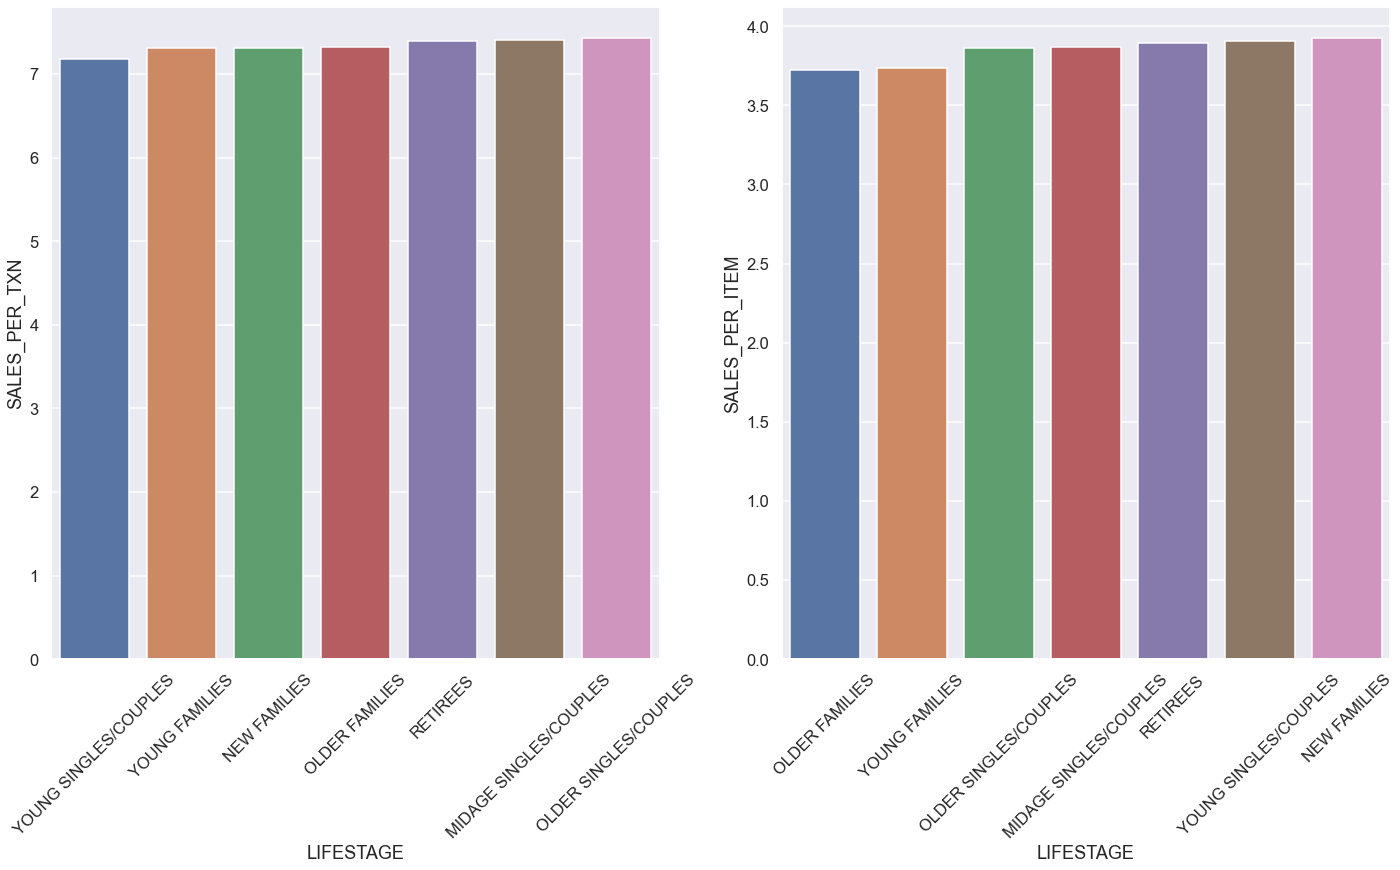

In [57]:
fig, axes = plt.subplots(1, 2,  figsize=(24, 12))

ax1 = sns.barplot(ax = axes[0], 
                  data = df_lifestage.sort_values('SALES_PER_TXN'), 
                  x = 'LIFESTAGE', 
                  y = 'SALES_PER_TXN'
                  )

ax2 = sns.barplot(ax = axes[1], 
                  data = df_lifestage.sort_values('SALES_PER_ITEM'), 
                  x = 'LIFESTAGE', 
                  y = 'SALES_PER_ITEM' 
                  )

ax1.tick_params(axis = 'x', rotation= 45)
ax2.tick_params(axis = 'x', rotation= 45)

plt.show()

***
As we can see that Retirees, Midage/Older singles/couples are more likely to spend more per transaction. However, Young singles/couples and New families tend to spend more per item while they are actually paying less per transaction when compared to other customer segments. 
This inconsistency may be due to that Young singles/couples and New families are less likely to purchase multiple items in one transaction. We will see if we can discover more to prove it in later analysis.
***

In [58]:
df_premium = df.groupby(['PREMIUM_CUSTOMER']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).sort_values(by='TOT_SALES')
df_premium.reset_index(inplace = True)
df_premium.head()

,PREMIUM_CUSTOMER,TXN_ID,TOT_SALES,PROD_QTY
0,Premium,69232,506158.95,132861
1,Budget,92512,676211.55,177898
2,Mainstream,101383,750744.50,193965


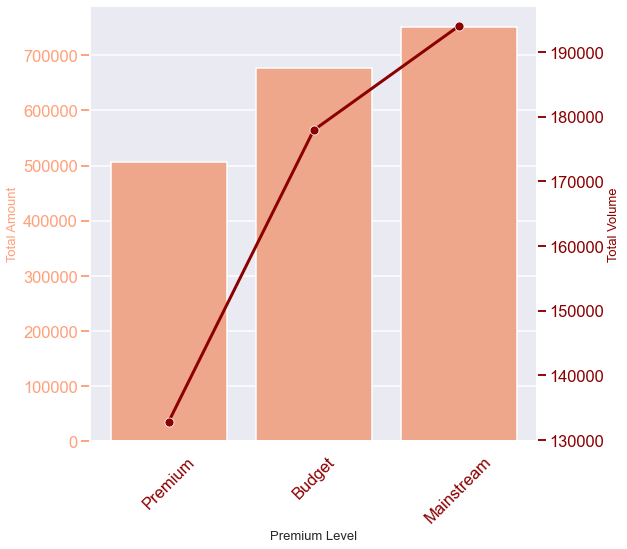

In [59]:
plt.figure(figsize=(8,8))
ax1 = sns.barplot(data = df_premium, 
                  x="PREMIUM_CUSTOMER", 
                  y = 'TOT_SALES', 
                  ci = None, 
                  color = 'lightsalmon'
                  )

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_premium, 
                   x = 'PREMIUM_CUSTOMER', 
                   y = 'PROD_QTY',  
                   linewidth =3, 
                   marker = 'o',
                   color = 'darkred'
                   )
ax2.grid(None)
ax1.set_xlabel('Premium Level', fontsize= 13)
ax1.set_ylabel('Total Amount', fontsize= 13, color = 'lightsalmon')
ax2.set_ylabel('Total Volume', fontsize= 13, color = 'darkred')
ax1.tick_params(axis = 'y', colors='lightsalmon')
ax2.tick_params(colors='darkred')
ax1.tick_params(axis = 'x', rotation= 45, colors = 'darkred')

plt.show()

In [60]:
df_premium['SALES_PER_TXN'] = df_premium['TOT_SALES']/df_premium['TXN_ID']
df_premium['SALES_PER_ITEM'] = df_premium['TOT_SALES']/df_premium['PROD_QTY']
df_premium.head()

,PREMIUM_CUSTOMER,TXN_ID,TOT_SALES,PROD_QTY,SALES_PER_TXN,SALES_PER_ITEM
0,Premium,69232,506158.95,132861,7.311055,3.809688
1,Budget,92512,676211.55,177898,7.309447,3.801119
2,Mainstream,101383,750744.50,193965,7.405033,3.870515


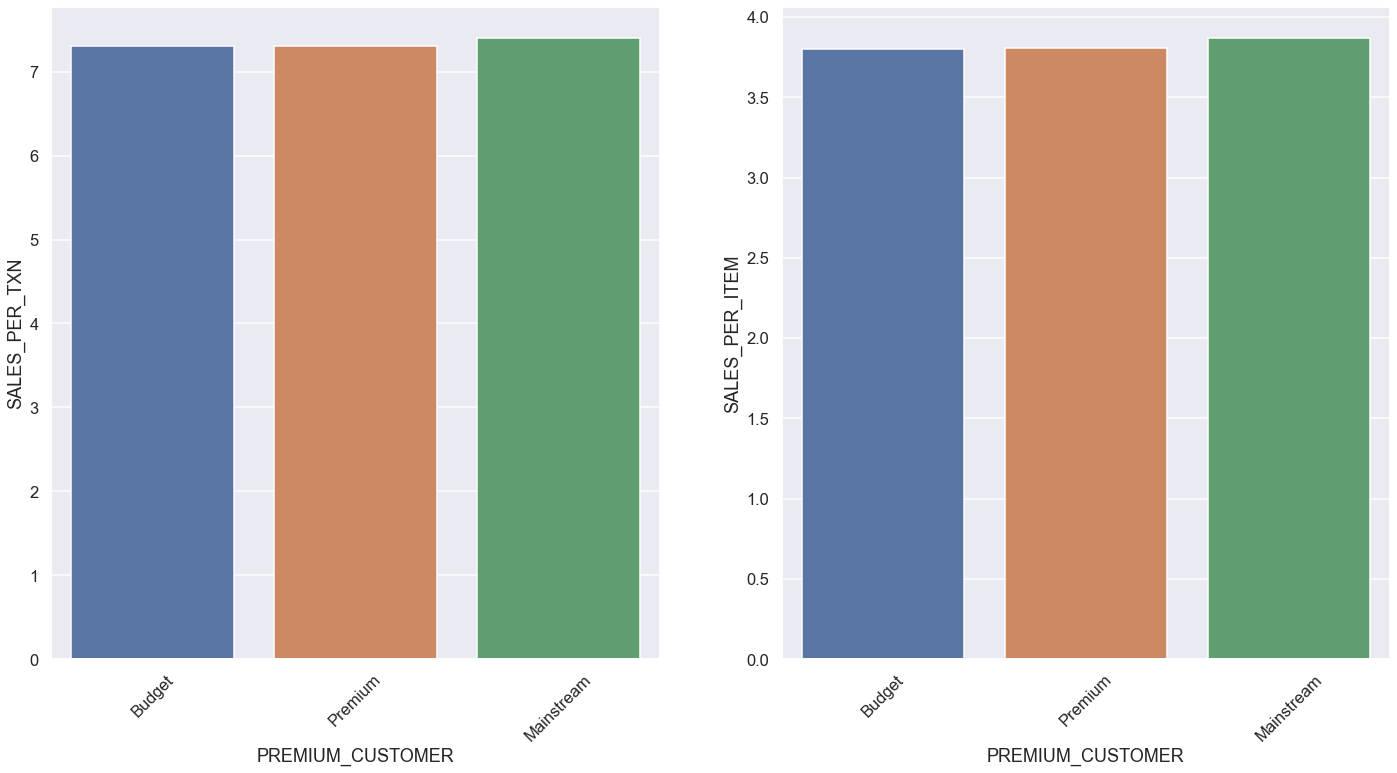

In [61]:
fig, axes = plt.subplots(1, 2,  figsize=(24, 12))

ax1 = sns.barplot(ax = axes[0], 
                  data = df_premium.sort_values('SALES_PER_TXN'), 
                  x = 'PREMIUM_CUSTOMER', 
                  y = 'SALES_PER_TXN'
                  )

ax2 = sns.barplot(ax = axes[1], 
                  data = df_premium.sort_values('SALES_PER_ITEM'), 
                  x = 'PREMIUM_CUSTOMER', 
                  y = 'SALES_PER_ITEM' 
                  )

ax1.tick_params(axis = 'x', rotation= 45)
ax2.tick_params(axis = 'x', rotation= 45)

plt.show()

***
We are not seeing any major difference in terms of sales per transaction/item among Budget or Premium customers. However, Mainstream customers tend to spend a bit more per transaction/item when compared to the rest of two segments.
***

In [62]:
df_ls_pre = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
df_ls_pre.reset_index(inplace = True)
df_ls_pre['SALES_PER_TXN'] = df_ls_pre['TOT_SALES']/df_ls_pre['TXN_ID']
df_ls_pre['SALES_PER_ITEM'] = df_ls_pre['TOT_SALES']/df_ls_pre['PROD_QTY']
df_ls_pre.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,TOT_SALES,PROD_QTY,SALES_PER_TXN,SALES_PER_ITEM
0,MIDAGE SINGLES/COUPLES,Budget,4988,35514.80,9496,7.120048,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,11801,90803.85,22699,7.694589,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,8160,58432.65,15526,7.160864,3.763535
3,NEW FAMILIES,Budget,2991,21928.45,5571,7.331478,3.936178
4,NEW FAMILIES,Mainstream,2321,17013.90,4319,7.330418,3.939315


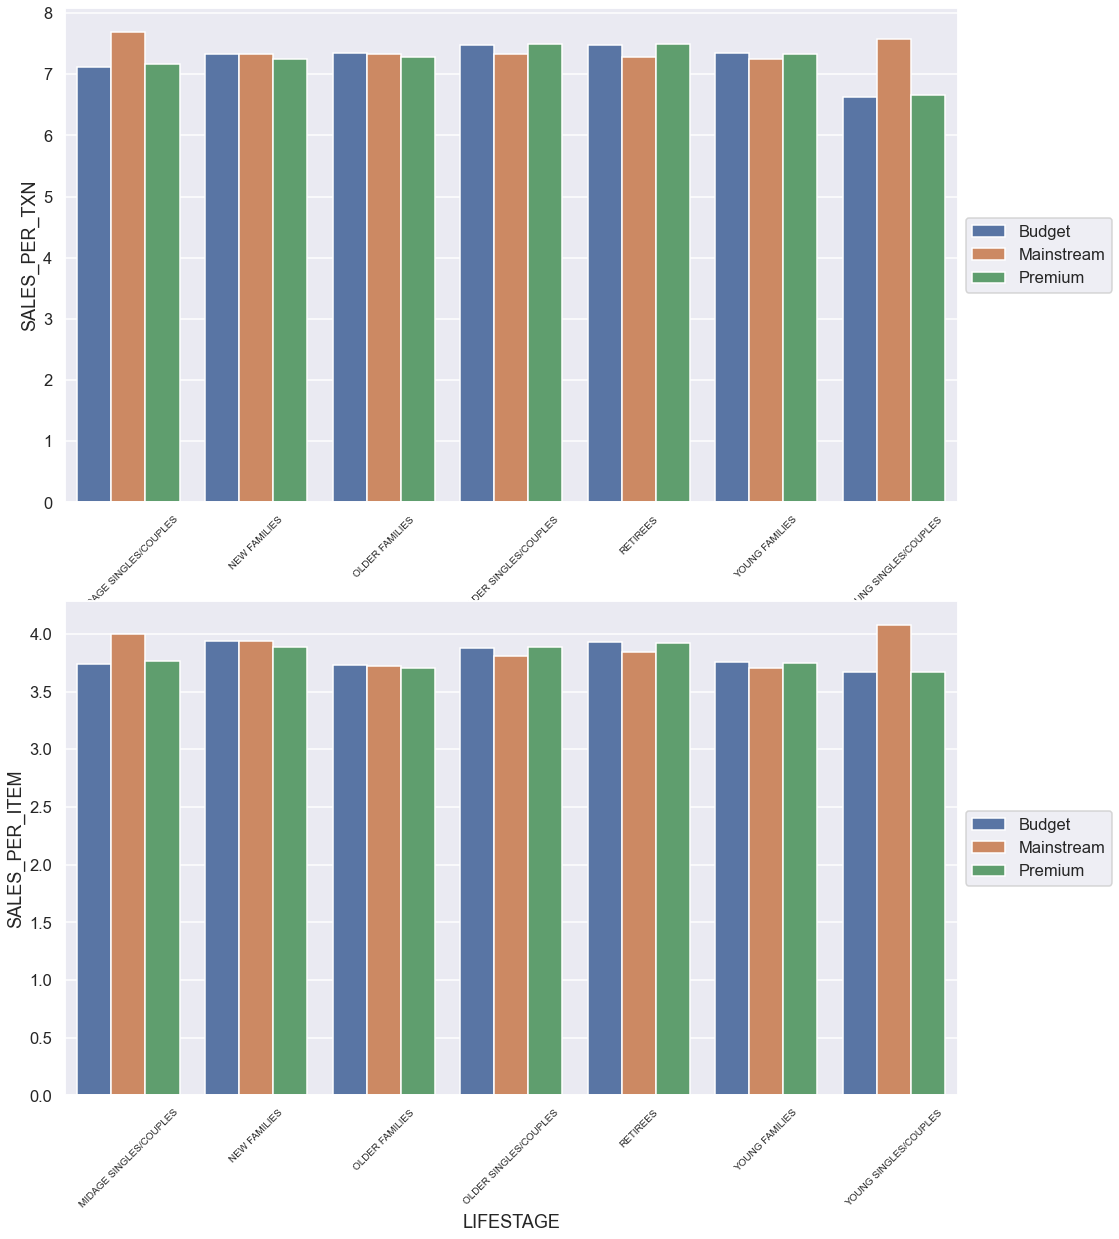

In [63]:
fig, axes = plt.subplots(2, 1,  figsize=(16,20))

sns.barplot(ax = axes[0], 
            data= df_ls_pre, 
            x="LIFESTAGE",
            y='SALES_PER_TXN',
            hue = 'PREMIUM_CUSTOMER'
            )

sns.barplot(ax = axes[1], 
            data= df_ls_pre, 
            x="LIFESTAGE",
            y='SALES_PER_ITEM',
            hue = 'PREMIUM_CUSTOMER'
            )
for ax in axes:
    ax.tick_params(axis = 'x', rotation= 45, labelsize=10)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


***
We have some interesting findings here which is that the mainstream of Young/Midage singles/couples are paying significantly more per transaction and per item compared to the their premium level counterparts. 

In general, we can see that older singles/couples and retirees are the two customer segments that paying the most per transaction and per item when compared to the rest of groups.

These customer groups will potentailly be considered to be our target customer groups at this stage
*** 

## In the next steps we are trying to separate stores that have better performance to the others. We are not only using total sales amount  and quantity as our condition as they can also be impacted by difference sizes of customer base. Hence, we will take sales per txn/item into our consideration as judgement criteria. 

In [64]:
def missing_elements(L):
    start, end = L[0], L[-2]
    return sorted(set(range(start, end + 1)).difference(L))

In [66]:
L = df['STORE_NBR'].unique()

In [67]:
# Here we see that stores are numbered in numerical order with no number skipped
# We then consider to use scatterplot to show store performance against their store numbers
missing_elements(L)

[]

In [68]:
df_store = df.groupby(['STORE_NBR']).agg({'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).sort_values(by='TOT_SALES')
df_store.reset_index(inplace = True)
df_store['SALES_PER_TXN'] = df_store['TOT_SALES']/df_store['TXN_ID']
df_store['SALES_PER_ITEM'] = df_store['TOT_SALES']/df_store['PROD_QTY']
df_store.head()

,STORE_NBR,TXN_ID,TOT_SALES,PROD_QTY,SALES_PER_TXN,SALES_PER_ITEM
0,211,2,5.2,2,2.60,2.60
1,76,1,6.0,2,6.00,3.00
2,11,2,6.7,2,3.35,3.35
3,252,2,7.4,2,3.70,3.70
4,206,2,7.6,2,3.80,3.80


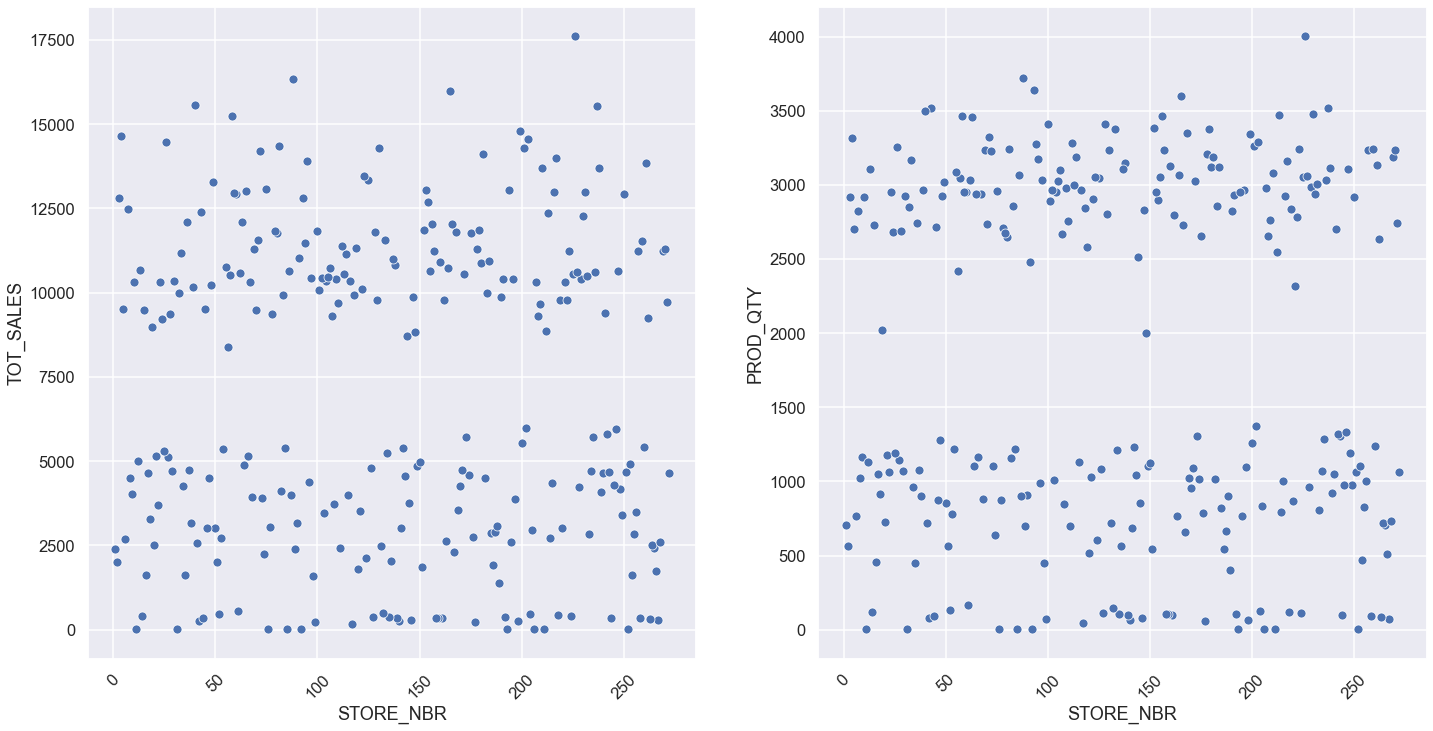

In [69]:
fig, axes = plt.subplots(1, 2,  figsize=(24, 12))

ax1 = sns.scatterplot(ax = axes[0], 
                  data = df_store, 
                  x = 'STORE_NBR',
                  y = 'TOT_SALES'
                  )

ax2 = sns.scatterplot(ax = axes[1], 
                  data = df_store,
                  x = 'STORE_NBR',
                  y = 'PROD_QTY' 
                  )

ax1.tick_params(axis = 'x', rotation= 45)
ax2.tick_params(axis = 'x', rotation= 45)

plt.show()

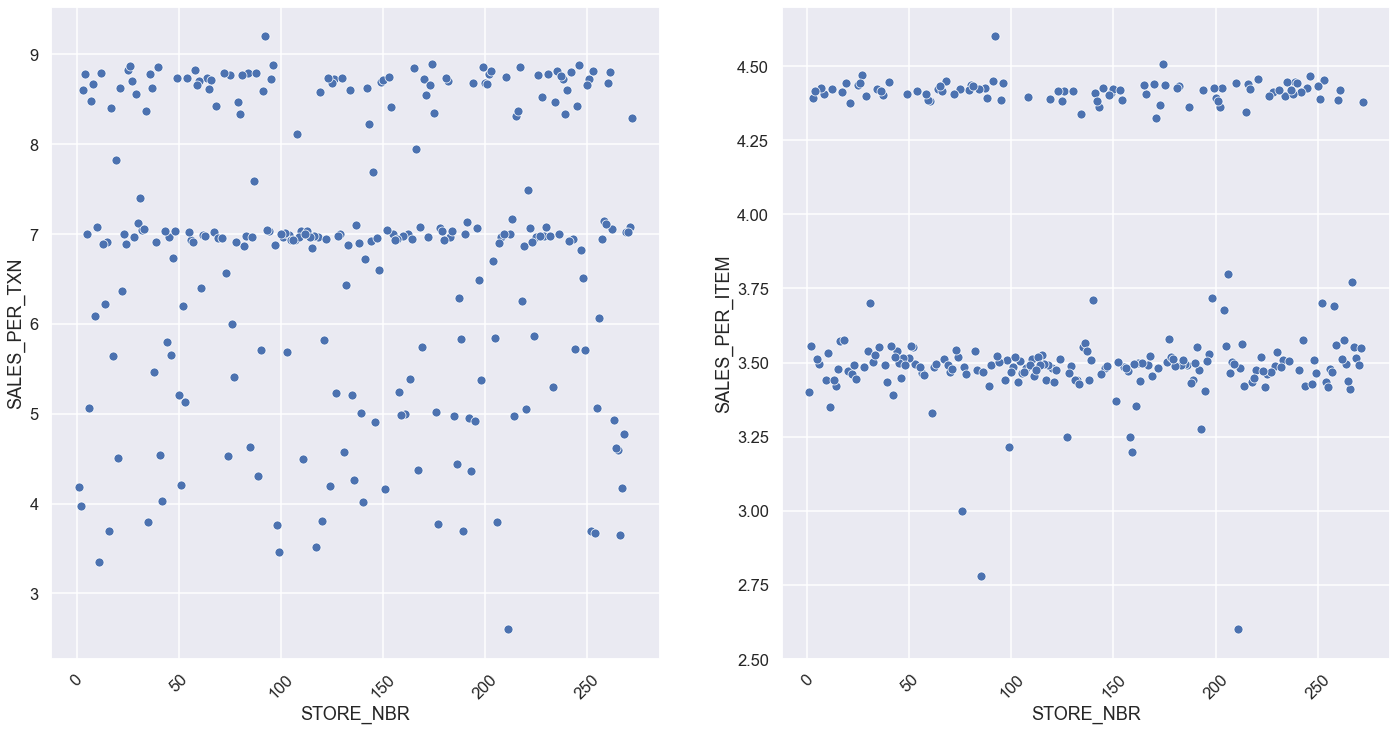

In [70]:
fig, axes = plt.subplots(1, 2,  figsize=(24, 12))

ax1 = sns.scatterplot(ax = axes[0], 
                  data = df_store, 
                  x = 'STORE_NBR',
                  y = 'SALES_PER_TXN'
                  )

ax2 = sns.scatterplot(ax = axes[1], 
                  data = df_store,
                  x = 'STORE_NBR',
                  y = 'SALES_PER_ITEM' 
                  )

ax1.tick_params(axis = 'x', rotation= 45)
ax2.tick_params(axis = 'x', rotation= 45)

plt.show()

***
From above graphs, we can clearly spot some patterns among the performance of stores. 
***

In [71]:
# According to the above graghs, we apply the thresholds to obtain stores with high perforamnce
high_perf_store = df_store[(df_store['TOT_SALES'] >= 7500) & (df_store['PROD_QTY'] >= 2000) & (df_store['SALES_PER_TXN'] >= 8) & (df_store['SALES_PER_ITEM'] >= 4)]
hp_store_list = high_perf_store['STORE_NBR'].tolist()


In [73]:
df_hp = df[df['STORE_NBR'].isin(hp_store_list)]

In [74]:
def cust_sales_plot(df):
    df_grouped = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().to_frame('TOT_SALES')
    sales_total = df_grouped['TOT_SALES'].sum()
    df_grouped = df_grouped.unstack('PREMIUM_CUSTOMER')
    ax = df_grouped.plot(kind='barh',stacked = True, title = 'Sales by Customer Segments', mark_right = True, figsize = (24,12))

    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        label = width / sales_total * 100
        x = rect.get_x()
        y = rect.get_y()

        label_text = f'{(label):.2f}%' 

        # Set label positions
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

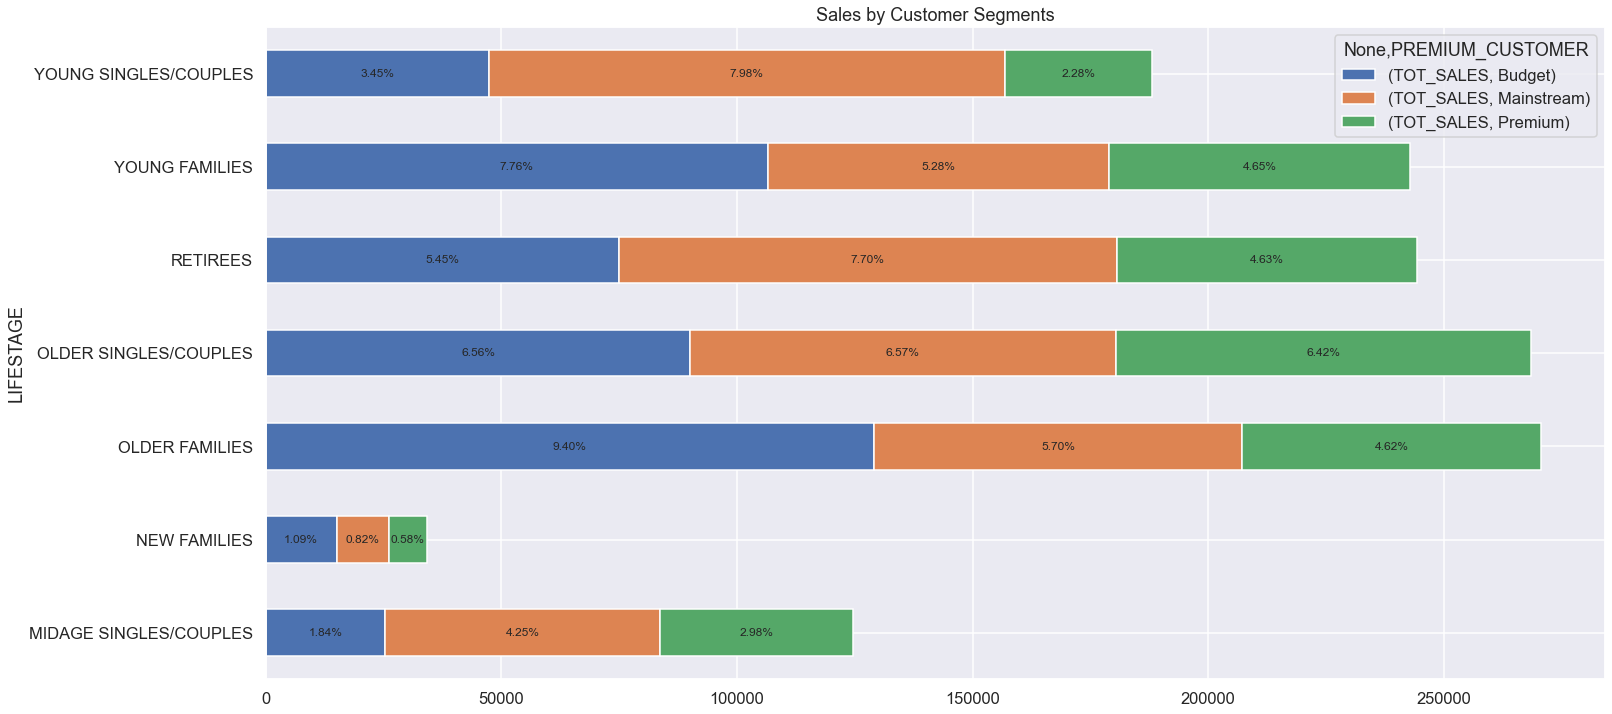

In [75]:
# Plot the sales percentage for non-high-perforamnce stores
cust_sales_plot(df[~df['STORE_NBR'].isin(hp_store_list)])

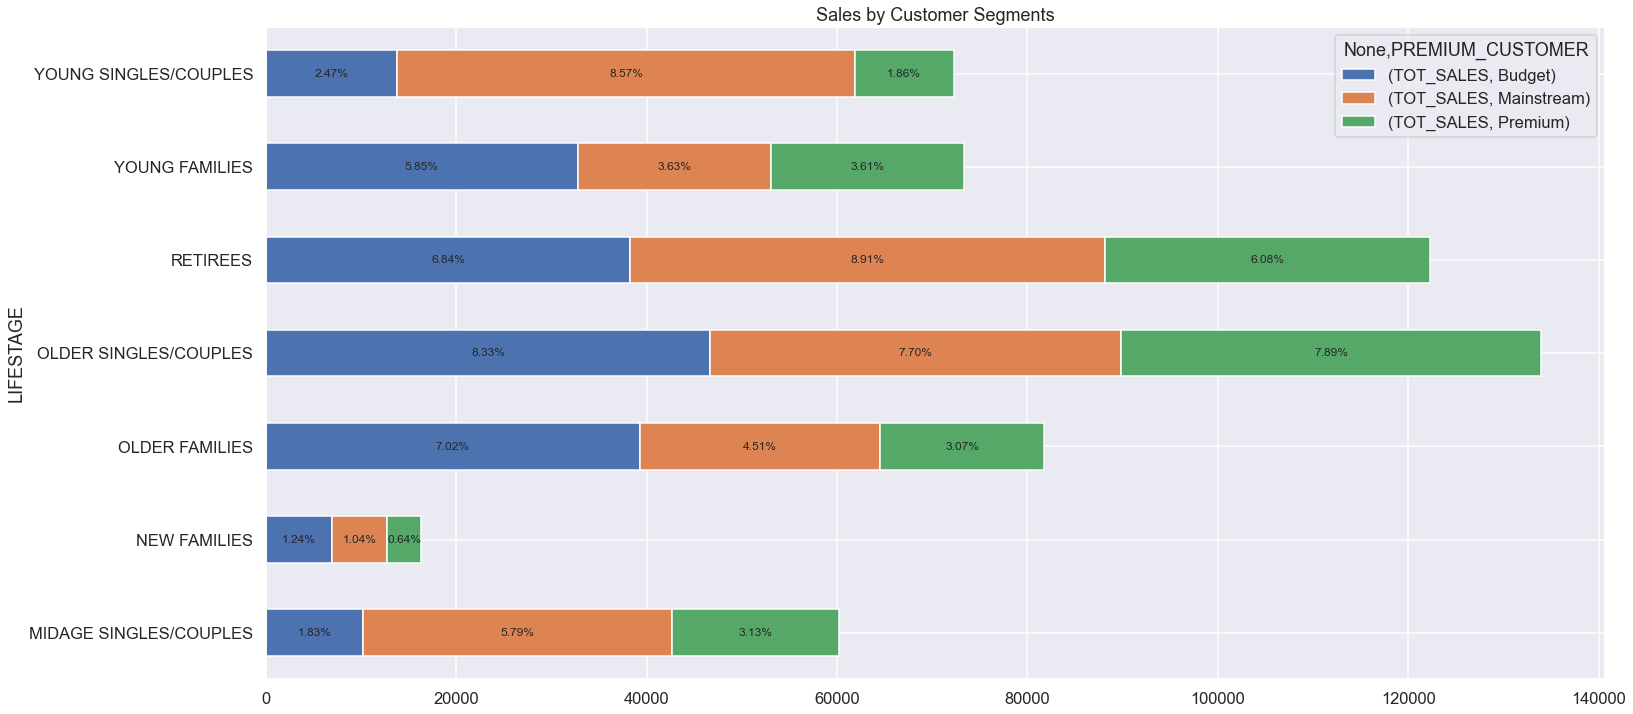

In [76]:
# Plot the sales percentage for high-perforamnce stores
cust_sales_plot(df_hp)

In [77]:
def cust_seg_plot(df):
    df_grouped = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().to_frame('COUNT')
    cust_total = df_grouped['COUNT'].sum()
    df_grouped = df_grouped.unstack('PREMIUM_CUSTOMER')
    ax = df_grouped.plot(kind='barh',stacked = True, title = 'Customer Segments', mark_right = True, figsize = (24,12))

    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        label = width / cust_total * 100
        x = rect.get_x()
        y = rect.get_y()

        label_text = f'{(label):.2f}%' 

        # Set label positions
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

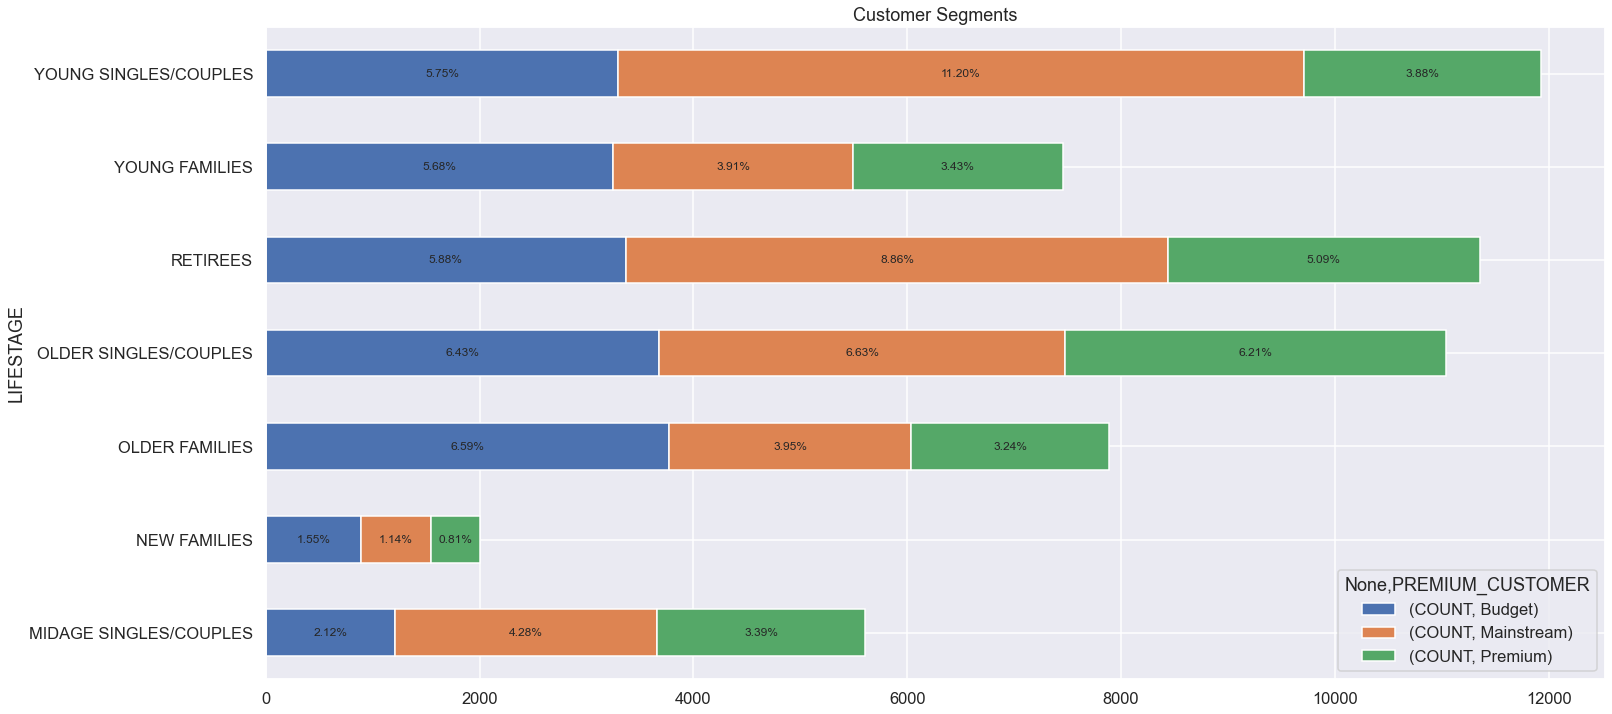

In [78]:
# Plot the customer segment percentage for non-high-perforamnce stores
cust_seg_plot(df[~df['STORE_NBR'].isin(hp_store_list)])

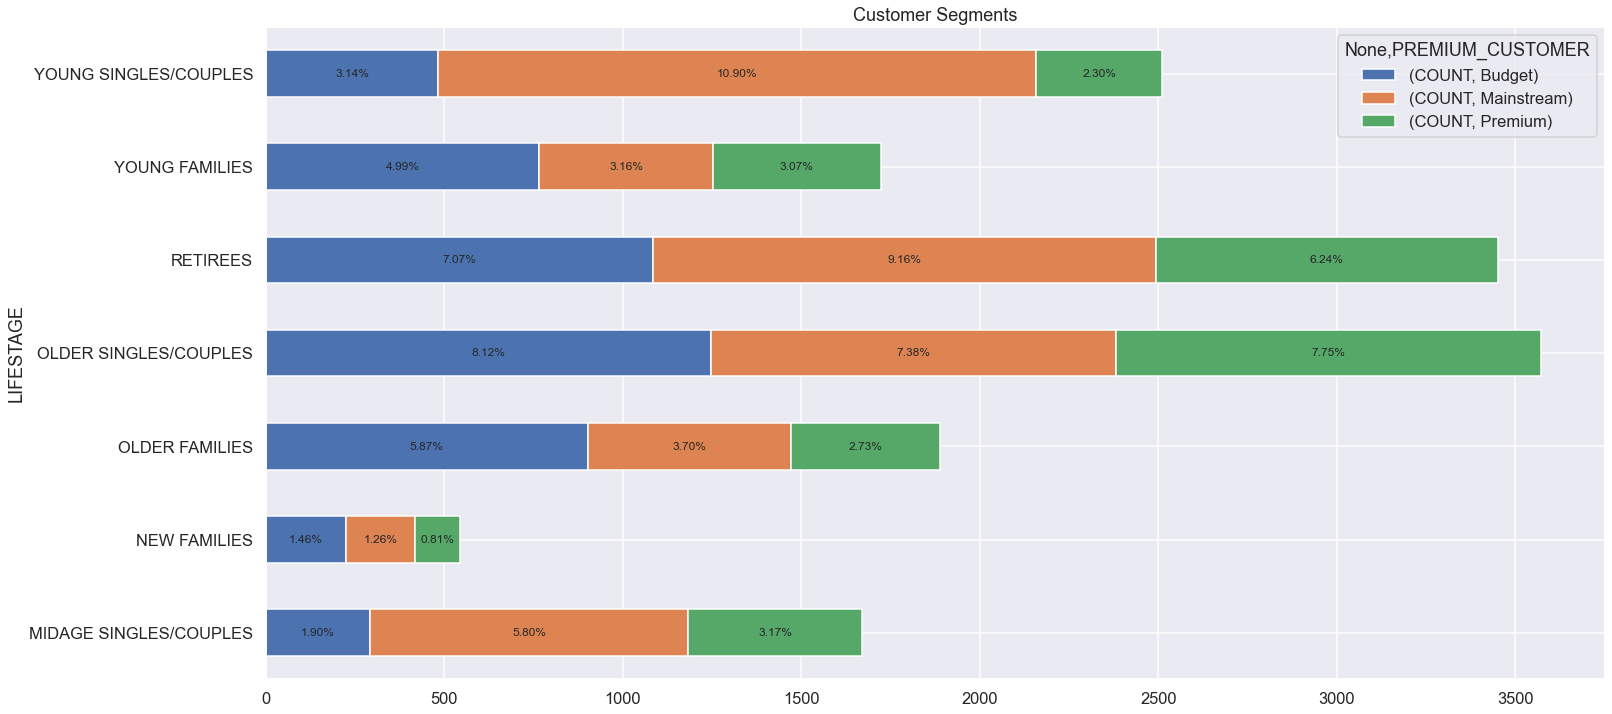

In [79]:
# Plot the customer segment percentage for high-perforamnce stores
cust_seg_plot(df_hp)

***
We can see that high performance stores have a relatively larger customer base around all three customer levels of retirees, older singles/couples, and the mainstream midage singles/couples when compared to the rest of stores.
Also we find that in terms of the total sales contribution, besides the above mentioned customer segments, the mainstream young singles/couples are also making a significantly higher contribution for those high performance stores compared to those non-high-performance stores
Hence we will be setting below customer segments as our target customers:
 - All retirees
 - All older singles/couples
 - Mainstream young singles/couples
 - Mainstream midage singles/couples
 ***

In [80]:
df_target_1 = df[df['LIFESTAGE'].isin(['RETIREES','OLDER SINGLES/COUPLES'])]
df_target_2 = df[(df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])) & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]

In [81]:
df_target = pd.concat([df_target_1, df_target_2])
df_target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,DAY,SEASON,WEEKDAY
80624,2018-08-18,2,2144,737,110,Original Corn Chips,1,1.9,Woolworths,200,OLDER SINGLES/COUPLES,Budget,18,2,Saturday
80625,2019-05-15,2,2144,738,50,Lightly Salted,1,4.4,Tostitos,175,OLDER SINGLES/COUPLES,Budget,15,1,Wednesday
80626,2019-05-19,2,2236,838,94,Rings,2,4.6,Burger,220,OLDER SINGLES/COUPLES,Budget,19,1,Sunday
80627,2018-08-14,3,3123,1589,30,Corn Chips Cheese Supreme,2,8.8,Doritos,170,OLDER SINGLES/COUPLES,Budget,14,2,Tuesday
80628,2018-08-18,3,3171,1808,47,Corn Chips Original,1,4.4,Doritos,170,OLDER SINGLES/COUPLES,Budget,18,2,Saturday


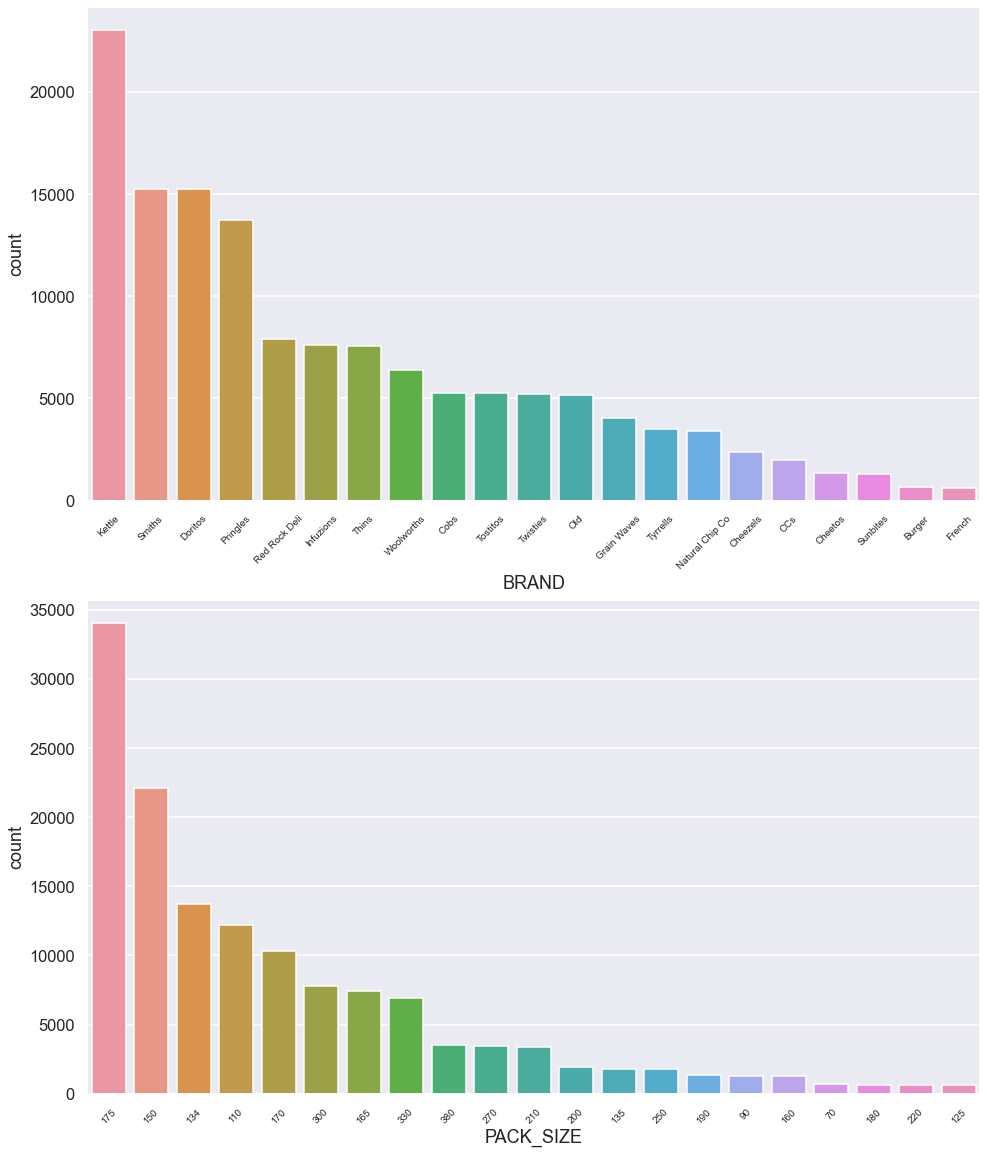

In [82]:
fig, axes = plt.subplots(2, 1,  figsize=(16,20))

sns.countplot(ax = axes[0], 
            data= df_target, 
            x='BRAND',
            order = df_target['BRAND'].value_counts().index
            )

sns.countplot(ax = axes[1], 
            data= df_target, 
            x='PACK_SIZE',
            order = df_target['PACK_SIZE'].value_counts().index
            )
for ax in axes:
    ax.tick_params(axis = 'x', rotation= 45, labelsize=10)
    

plt.show()

***
from the above graphs we can see there is no major difference among the package sizes of the high-performance stores and all the rest of the stores. Thus we can draw an initial conclusion that the package size is not a determinant factor in sales performance. 
***

## Then we will look at transactions that involves multiple items as its a efficient way to increase the sales without incurring much extra operational costs.

In [83]:
# We select the transactions that involves multiple items
count = df['TXN_ID'].value_counts()
df_multi_buy = df[df['TXN_ID'].isin(count.index[count > 1])]

In [84]:
df_multi_buy.groupby(['TXN_ID']).agg({'TOT_SALES': 'sum'})
df_multi_buy.reset_index(inplace = True)
avg_sale_mb = (df_multi_buy['TOT_SALES'].sum())/(df_multi_buy['TXN_ID'].nunique())

In [85]:
avg_sale_mb

14.607961222091657

In [86]:
avg_sale_sg = df[~df['TXN_ID'].isin(count.index[count > 1])]['TOT_SALES'].mean()
avg_sale_sg

7.299481109158913

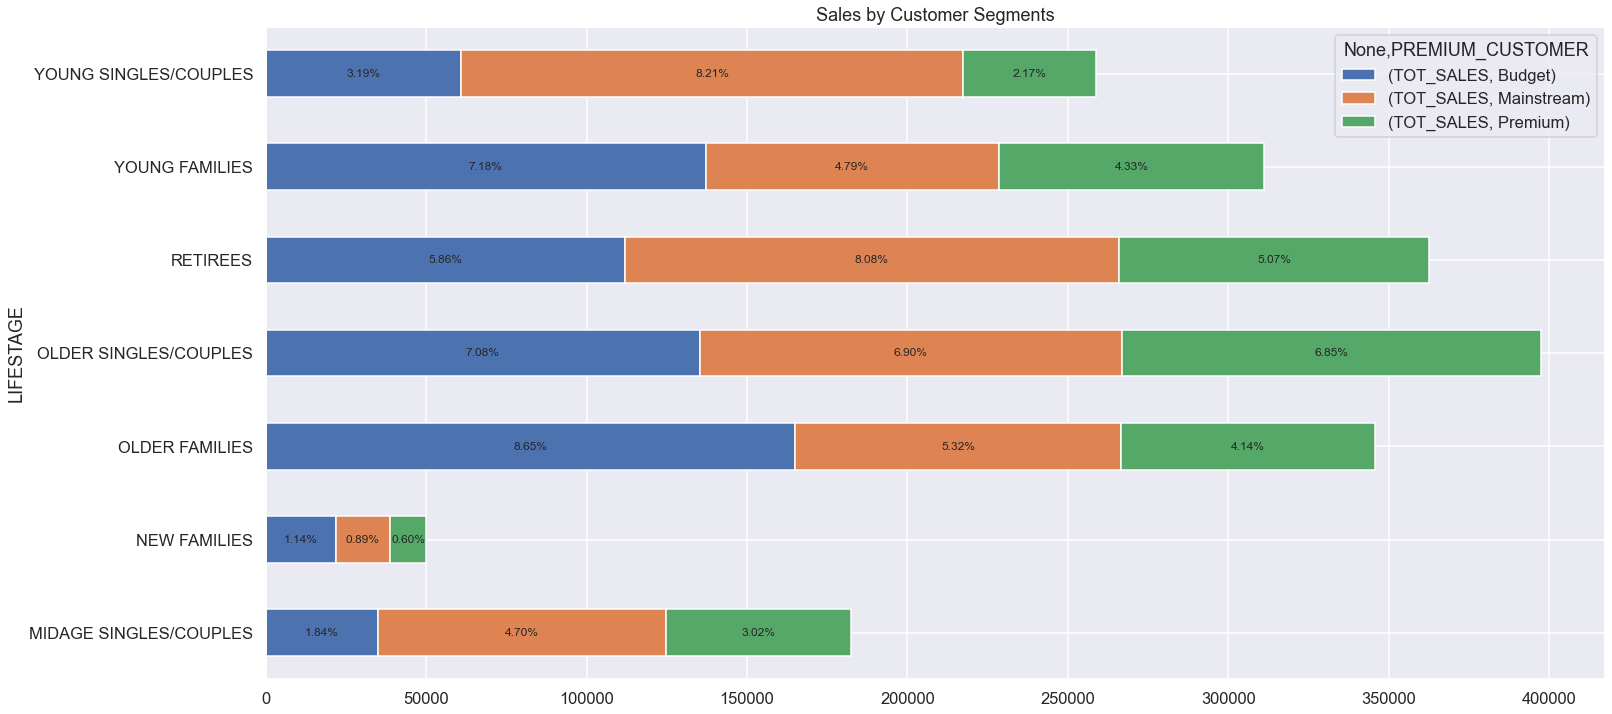

In [87]:
cust_sales_plot(df[~df['TXN_ID'].isin(count.index[count > 1])])

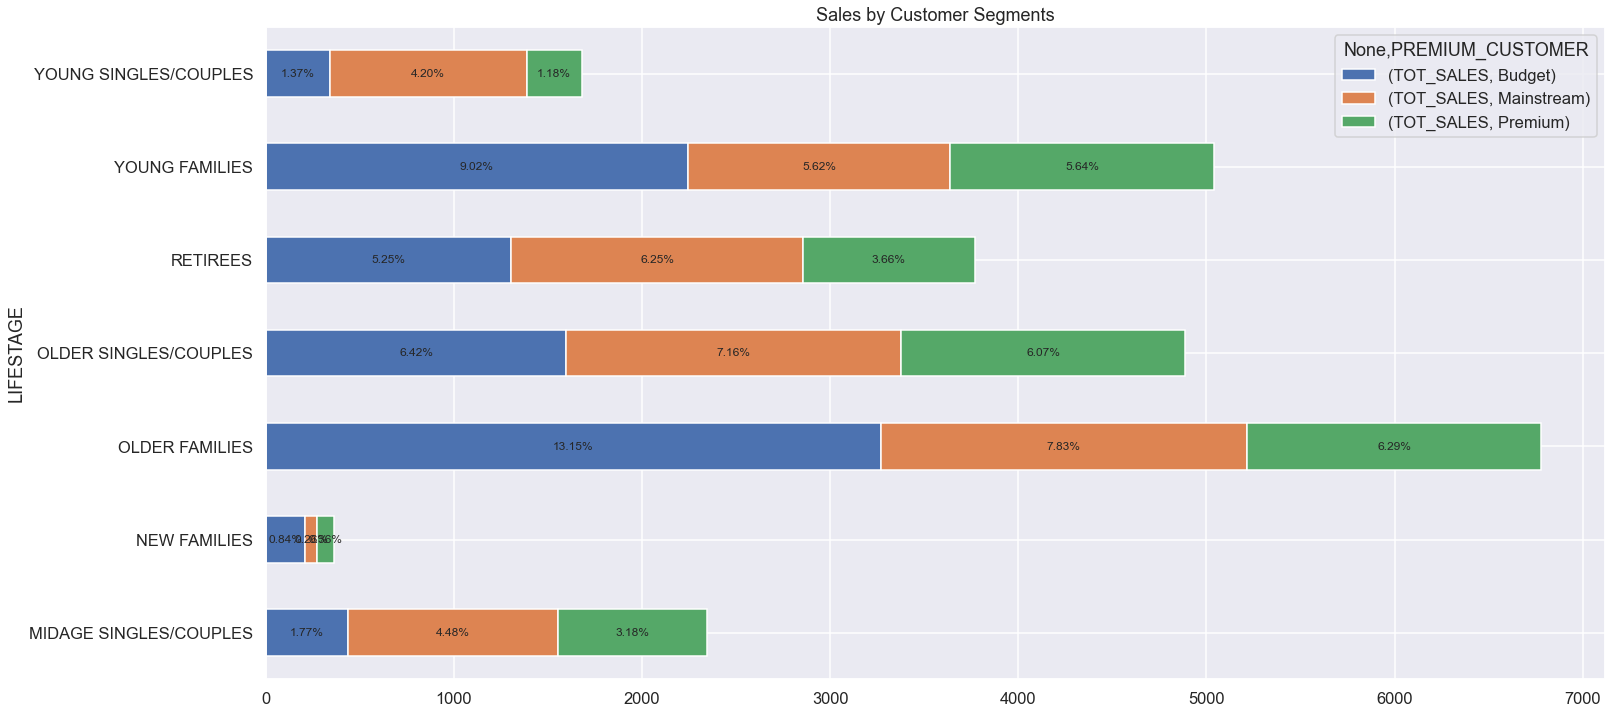

In [88]:
cust_sales_plot(df_multi_buy)

***
We can see that the customer segments that contributed most to and have a higher tendency to purchase multiple products in one transactions are all three customer levels of young and older families.

Hence we will be targeting below customer segments for further analysis on multiple products purchases:
 - Young Families
 - Older Families
***

In [117]:
df_target_mul = df[df['LIFESTAGE'].isin(['YOUND FAMILIES','OLDER FAMILIES'])]

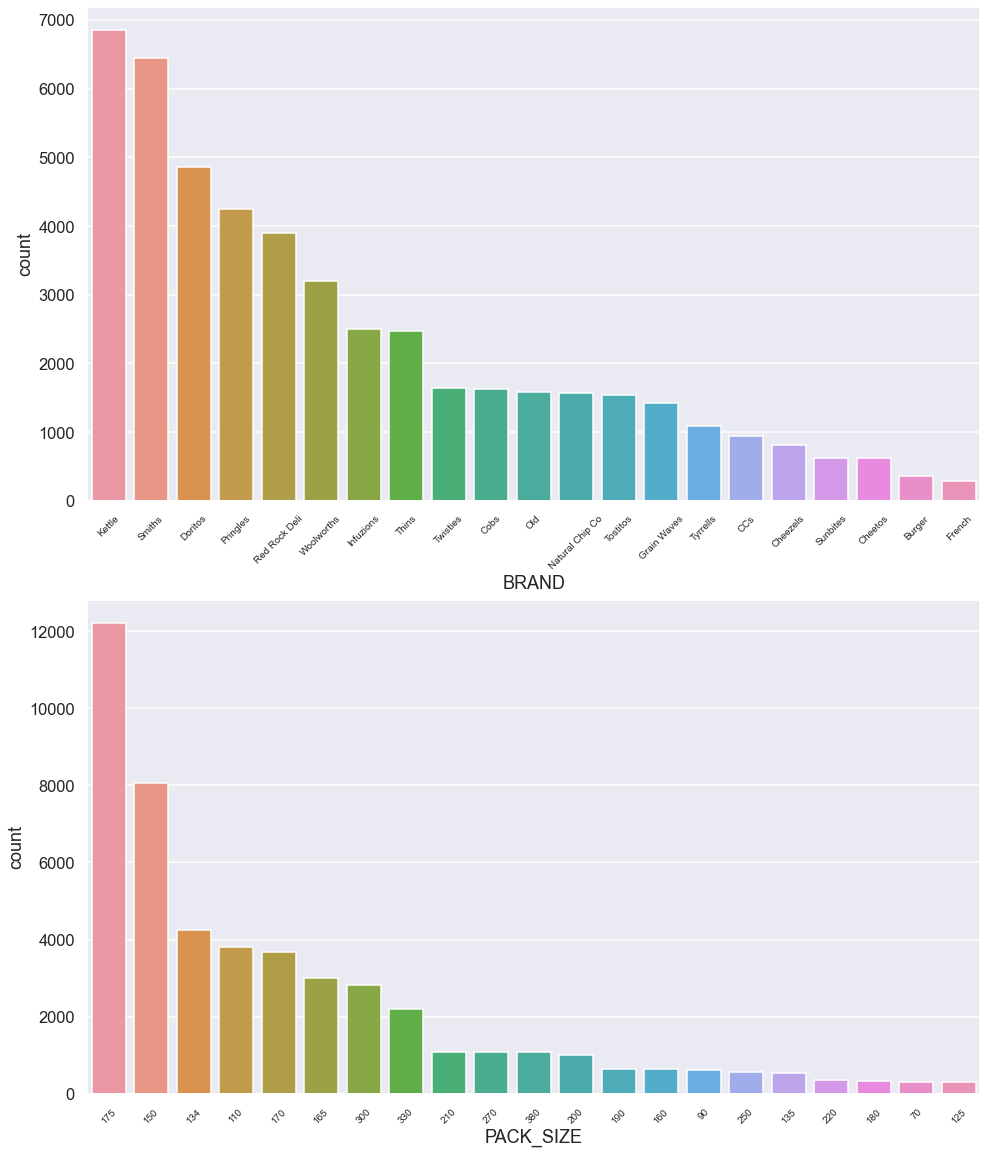

In [118]:
fig, axes = plt.subplots(2, 1,  figsize=(16,20))

sns.countplot(ax = axes[0], 
            data= df_target_mul, 
            x='BRAND',
            order = df_target_mul['BRAND'].value_counts().index
            )

sns.countplot(ax = axes[1], 
            data= df_target_mul, 
            x='PACK_SIZE',
            order = df_target_mul['PACK_SIZE'].value_counts().index
            )
for ax in axes:
    ax.tick_params(axis = 'x', rotation= 45, labelsize=10)
    

plt.show()

## In the next stage, we are trying to utilize Apiori Market Basket analysis to further discover any association rule among products purchased in multi-products transactions. With proper association rule, we will be able to tell what product is more likely to be sold together with others and we can adjust the marketing strategies like promotional discounts, placing associated products closer on shelves etc. 

## However, due to multi-products transactions only count for a small proportion of all the transactions, we may require more data to achieve an acceptable outcome. Here we will give it a try.

In [121]:
prod_basket = list()
for i in df_multi_buy['TXN_ID'].unique():
    a = df_multi_buy[df_multi_buy['TXN_ID'] == i]['BRAND'].tolist()
    prod_basket.append(a)


In [106]:
encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(prod_basket)
print(encode_arr)

[[False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [107]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,...,Old,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1699,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [108]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.020564,(Burger)
1,0.032315,(CCs)
2,0.026439,(Cheetos)
3,0.038778,(Cheezels)
4,0.073443,(Cobs)
5,0.199177,(Doritos)
6,0.015864,(French)
7,0.055817,(Grain Waves)
8,0.103408,(Infuzions)
9,0.271445,(Kettle)


In [116]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=1,support_only=False)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


***
Here we found no product combination that has a lift greater than 1. Hence we consider no obvious association rule can be derived from the data that we have. Given the fact that transactions with multiple product purchased only counts for a relatively small portion of all the sales, the Apiori market basket analysis can be performed if more transaction data will be obatined.
***

***
### Summary of our findings and recommendations:

- The sales peak right before the Christmas and it was mainly due to the increse of sales quantity as there were no obvious change from sales per txn/item, which means a much higher customer footfall.Hence, the window period right before the Christmas Day will be an ideal period for promotional activities as it can easily reach out to much more customers without incurring too much extra costs.

- The two steep drops around the mid August and mid May, both overall sales volumes and sales amount per txn dropped significantly. To fruther understand the reason causing the decline, we may need to discuss with stores managers to obtain more information

- Based on our analysis on high-performance stores compared to the rest. We suggest to set below customer segments as our target customers to whom promotional activities can be designed for:
 - All retirees
 - All older singles/couples
 - Mainstream young singles/couples
 - Mainstream midage singles/couples
 
- One fact that draws our attention is multi-products transactions only count for a very small proportion of all the transactions recorded. However, this type of transactions is of great importance as it comes with higher sales values with relatively smaller oeprational costs compared to multiple separate transactions with the same sales total. Due to the scarcity of multi-products transactions data, we recommend obtain more data from this area for further analytics and focus to be placed on below customer segments
 - Young Families
 - Older Families
***